Python analysis methodology:

1. I am exploring data test provided by NHS - checking all three sets data types, shape, and columns.
2. Checking data for NaN values to ensure data validity.
3. I am checking metadata for high level overview of data sets.
4. Analysing data sets to establish high level overview of demand in NHS - number of regions, busiest regions, number of appointments by type, context, national category, mode.
5. Converting numerical results to percentage for easier data interpretation.
6. Calculating number of appointmetns by month.
7. Creating visualisations to represent analysed data.
8. Analysing Tweeter data by fultering top tweets and analysing hashtags.
9. Plotting data and creating visualisations for various scenarios, testing data against appointment count and seasons, and analysing utilisation levels.    

Importing and sens-checking data.

In [83]:
#Importing the necessary libraries.
import pandas as pd
import numpy as np

ad = pd.read_csv('actual_duration.csv')

#Viewing data:
print(ad.shape)
print(ad.dtypes)
print(ad.columns)

ad.head()

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [84]:
#Reviewing metadata and descriptive statistics.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [85]:
#Reviewing metadata and descriptive statistics.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [86]:
#Importing appointments_regional csv into DataFrame
ar = pd.read_csv('appointments_regional.csv')

#Viewing DataFrame
print(ar.shape)
print(ar.dtypes)
print(ar.columns)

#View data head:
ar.head()

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [87]:
#Reviewing metadata and descriptive statistics.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [88]:
# Review metadata and descriptive statistics.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [89]:
#Importing national_categories csv into DataFrame
nc = pd.read_excel('national_categories.xlsx')

#Viewing DataFrame
print(nc.shape)
print(nc.dtypes)
print(nc.columns)

nc.head()

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [90]:
#Reviewing metadata and descriptive statistics.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


In [91]:
#Reviewing metadata and descriptive statistics.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [92]:
#Checking for missing values in actual_duration by using isna() function:
ad_na = ad[ad.isna().any(axis=1)]

#View the top five rows of the DataFrame.
ad_na.shape

(0, 8)

In [93]:
#Checking for missing values in actual_duration by using isna() function:
ar_na = ar[ar.isna().any(axis=1)]

#View the top five rows of the DataFrame.
ar_na.shape

(0, 7)

In [94]:
#Checking for missing values in actual_duration by using isna() function:
nc_na = nc[nc.isna().any(axis=1)]

#View the top five rows of the DataFrame.
nc_na.shape

(0, 8)

How many locations are there in the data set?

In [95]:
#Determine the number of locations.
ad_loc_count = ad['icb_ons_code'].unique()
ar_loc_count = ar['icb_ons_code'].unique()
nc_loc_count = nc['icb_ons_code'].unique()

#View DataFrame
print(ad_loc_count.shape)
print(ar_loc_count.shape)
print(nc_loc_count.shape)
print(f"actual_duration contains {ad_loc_count.shape} locations.")
print(f"appointments_regional contains {ar_loc_count.shape} locations.")
print(f"national_categories contains {nc_loc_count.shape} locations.")

#Checking consistency of locations
if set(ad_loc_count) == set(ar_loc_count)  == set(nc_loc_count):
    print("Locations are consistent")
else:
    print("Locations are not consistent")

(42,)
(42,)
(42,)
actual_duration contains (42,) locations.
appointments_regional contains (42,) locations.
national_categories contains (42,) locations.
Locations are consistent


What are the five locations with the highest number of records?

In [96]:
#Determine the top five locations based on record count.
#Group the DataFrame by 'sub_icb_location_name' and calculate the sum of 'count_of_appointments'
location_counts = ad.groupby('sub_icb_location_name')['count_of_appointments'].sum()

#Sort the locations in descending order by count and get the top five
top_five_locations = location_counts.sort_values(ascending=False).head(5)

#Viewwing results
print("Top five locations based on record count of appointments:")
print(top_five_locations)

Top five locations based on record count of appointments:
sub_icb_location_name
NHS North West London ICB - W2U3Z              6976986
NHS North East London ICB - A3A8R              5341883
NHS Kent and Medway ICB - 91Q                  5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
NHS South East London ICB - 72Q                4360079
Name: count_of_appointments, dtype: int64


How many service settings, context types, national categories, and appointment statuses are there?

In [97]:
#Determine the number of appointment modes.
appointment_mode_counts = ar.appointment_mode.value_counts(ascending=True)
total_appointments = len(ar)

#Calculating percentag value of each mode
mode_percentage = (appointment_mode_counts / total_appointments) * 100

#Viewing result
print(mode_percentage)

Video/Online     9.984066
Unknown         13.261430
Home Visit      18.631047
Telephone       27.894963
Face-to-Face    30.228494
Name: appointment_mode, dtype: float64


In [98]:
#Determine the number of appointment statuses.
status_count = ar.appointment_status.value_counts(ascending=True)
total_status = len(ar)

#Calculating percentag value of each mode
status_percentage = (status_count / total_status) * 100

#Viewing result
print(mode_percentage)

Video/Online     9.984066
Unknown         13.261430
Home Visit      18.631047
Telephone       27.894963
Face-to-Face    30.228494
Name: appointment_mode, dtype: float64


In [99]:
#Determine the number of context types.
context_count = nc.context_type.value_counts(ascending=True)
total_context = len(nc)

#Calculating percentag value of each mode
context_percentage = (context_count / total_context) * 100

#Viewing result
print(context_percentage)

Unmapped                   3.354441
Inconsistent Mapping      10.948698
Care Related Encounter    85.696861
Name: context_type, dtype: float64


In [100]:
#Determine the number of service settings.
setting_count = nc.service_setting.value_counts(ascending=True)
total_setting = len(nc)

#Calculating percentag value of each mode
setting_percentage = (setting_count / total_setting) * 100

#Viewing result
print(setting_percentage)

Unmapped                      3.354441
Extended Access Provision    13.227648
Other                        16.979449
Primary Care Network         22.484873
General Practice             43.953589
Name: service_setting, dtype: float64


In [101]:
#Determine the number of national categories.
nc_count = nc.national_category.value_counts(ascending=True)
nc_total = len(nc)

#Calculating percentag value of each mode
nc_percentage = (nc_count / nc_total) * 100

#Viewing result
print(nc_percentage)

Group Consultation and Group Education                                  0.653418
Walk-in                                                                 1.734659
Non-contractual chargeable work                                         2.556417
Care Home Needs Assessment & Personalised Care and Support Planning     2.875602
Social Prescribing Service                                              3.241032
Care Home Visit                                                         3.259628
Unmapped                                                                3.354441
Patient contact during Care Home Round                                  3.522781
Unplanned Clinical Activity                                             4.944372
Home Visit                                                              5.119930
Service provided by organisation external to the practice               5.272243
Structured Medication Review                                            5.440094
Planned Clinical Procedure  

Between what dates were appointments scheduled?

In [102]:
#View the first five rows of appointment_date for the nc DataFrame to determine the date format.
print(ad['appointment_date'].head())

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object


In [103]:
#Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

#View the amended column
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [104]:
#Convert 'appointment_month' column to datetime format with the current format '%y-%b'
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

#View the amended column
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       596821 non-null  object        
 1   appointment_month                  596821 non-null  datetime64[ns]
 2   appointment_status                 596821 non-null  object        
 3   hcp_type                           596821 non-null  object        
 4   appointment_mode                   596821 non-null  object        
 5   time_between_book_and_appointment  596821 non-null  object        
 6   count_of_appointments              596821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 31.9+ MB


In [105]:
#Viewwing appointment_date results
print(nc['appointment_date'].head())

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]


In [106]:
#Determining min amd max date in ad DataSet
date_min_ad = ad['appointment_date'].min().strftime('%y-%m-%d')
date_max_ad = ad['appointment_date'].max().strftime('%y-%m-%d')

#Viewwing results
print(f"Dates range for ad DataFrame range between {date_min_ad} to {date_max_ad}." )
ad.shape

Dates range for ad DataFrame range between 21-12-01 to 22-06-30.


(137793, 8)

In [107]:
#Determining min amd max date in nc DataSet
date_min_nc = nc['appointment_date'].min().strftime('%y-%m-%d')
date_max_nc = nc['appointment_date'].max().strftime('%y-%m-%d')

#Viewwing results
print(f"Dates range for nc DataFrame range between {date_min_nc} to {date_max_nc}." )
nc.shape

Dates range for nc DataFrame range between 21-08-01 to 22-06-30.


(817394, 8)

Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [108]:
#For each of these service settings, determine the number of records available for the period and the location.
#Filter data for the specified period
start_date = '2022-01-01'
end_date = '2022-06-01'

#Filtering nc DataFrame to specific date
filtered_nc = nc[(nc['appointment_date'] >= start_date) & (nc['appointment_date'] <= end_date)]

#Grouping by 'service_setting' and 'sub_icb_location_name' and count the appointments
nc_serv_set = filtered_nc.groupby(['service_setting', 'sub_icb_location_name'])['appointment_date'].count()

#Viewwing DataFrame
print(nc_serv_set)

service_setting            sub_icb_location_name                                           
Extended Access Provision  NHS Bath and North East Somerset Swindon and Wiltshire ICB - 92G    830
                           NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y                566
                           NHS Birmingham and Solihull ICB - 15E                               865
                           NHS Black Country ICB - D2P2L                                       987
                           NHS Bristol North Somerset and South Gloucestershire ICB - 15C      801
                                                                                              ... 
Unmapped                   NHS West Yorkshire ICB - 02T                                        130
                           NHS West Yorkshire ICB - 03R                                        137
                           NHS West Yorkshire ICB - 15F                                        129
                 

Which month had the highest number of appointments?

In [109]:
#Replacing 'appointment_month' and 'count_of_appointments' with your actual column names

nc_app_bymonth = nc.groupby('appointment_month')[['count_of_appointments']]\
    .sum()\
    .sort_values('count_of_appointments', ascending=True)

#Calculating the total count of appointments
total_appointments = nc_app_bymonth['count_of_appointments'].sum()

#Calculating the percentage for each row
nc_app_bymonth['percentage'] = (nc_app_bymonth['count_of_appointments'] / total_appointments) * 100

#View the result
print(nc_app_bymonth)

                   count_of_appointments  percentage
appointment_month                                   
2021-08                         23852171    8.056893
2022-04                         23913060    8.077460
2021-12                         25140776    8.492164
2022-02                         25355260    8.564613
2022-01                         25635474    8.659265
2022-06                         25828078    8.724324
2022-05                         27495508    9.287555
2021-09                         28522501    9.634458
2022-03                         29595038    9.996744
2021-10                         30303834   10.236164
2021-11                         30405070   10.270360


What was the total number of records per month?

In [110]:
#Grouping nc DataFrame to show count of records by month
nc_rec_bymonth = nc.groupby('appointment_month')[['count_of_appointments']]\
.count()

#Viewwing results
print("count of records per month is", nc_rec_bymonth)

count of records per month is                    count_of_appointments
appointment_month                       
2021-08                            69999
2021-09                            74922
2021-10                            74078
2021-11                            77652
2021-12                            72651
2022-01                            71896
2022-02                            71769
2022-03                            82822
2022-04                            70012
2022-05                            77425
2022-06                            74168


Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [111]:
#Change the data type of the appointment month to string to allow for easier plotting.
#Convert 'appointment_month' column to string
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

In [112]:
#Aggregate on a monthly level and determine the sum of records per month.
count_of_app_nc = nc.groupby('appointment_month').size()

#Sorting appointments in descending order
highest_appointments = nc.groupby(nc['appointment_month'].dt.month_name())[['count_of_appointments']].sum()\
.sort_values(by='count_of_appointments',ascending=False)
highest_appointments

,count_of_appointments
appointment_month,
November,30405070
October,30303834
March,29595038
September,28522501
May,27495508
June,25828078
January,25635474
February,25355260
December,25140776


In [113]:
#Import the visualisation libraries.
import seaborn as sns
import matplotlib.pyplot as plt

#Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

#Set the plot style as white.
sns.set_style('white')

In [114]:
#Plot the appointments over the available date range, and review the service settings for months
nc_2 = nc[['appointment_month', 'service_setting', 'count_of_appointments', 'context_type', 'national_category']]

#Viewing the result
nc_2.head()

,appointment_month,service_setting,count_of_appointments,context_type,national_category
0,2021-08-01,Primary Care Network,3,Care Related Encounter,Patient contact during Care Home Round
1,2021-08-01,Other,7,Care Related Encounter,Planned Clinics
2,2021-08-01,General Practice,79,Care Related Encounter,Home Visit
3,2021-08-01,General Practice,725,Care Related Encounter,General Consultation Acute
4,2021-08-01,General Practice,2,Care Related Encounter,Structured Medication Review


C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\815674539.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_month',


Text(0.5, 1.0, 'NC Service Setting by Month')

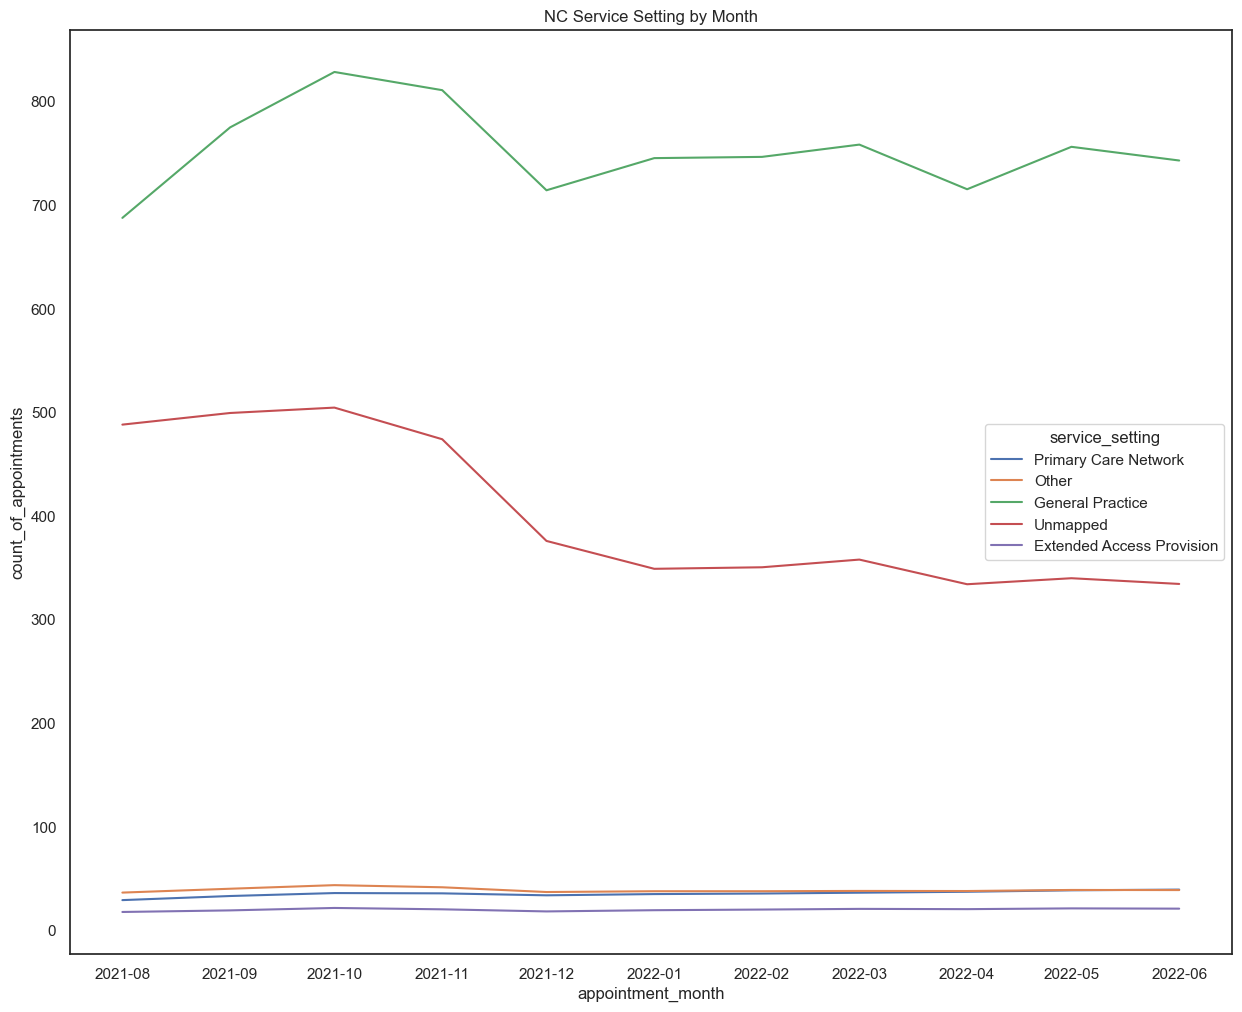

In [115]:
#Plot the appointments over the available date range, and reviewing the service settings for months
#Create a lineplot.
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,}

#Creating lineplot
sns.lineplot(x='appointment_month',
             y='count_of_appointments',
             hue='service_setting',
             data=nc_2,
             ci=None).set_title("NC Service Setting by Month")

C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\3401974126.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_month',


Text(0.5, 1.0, 'NC Context type by Month')

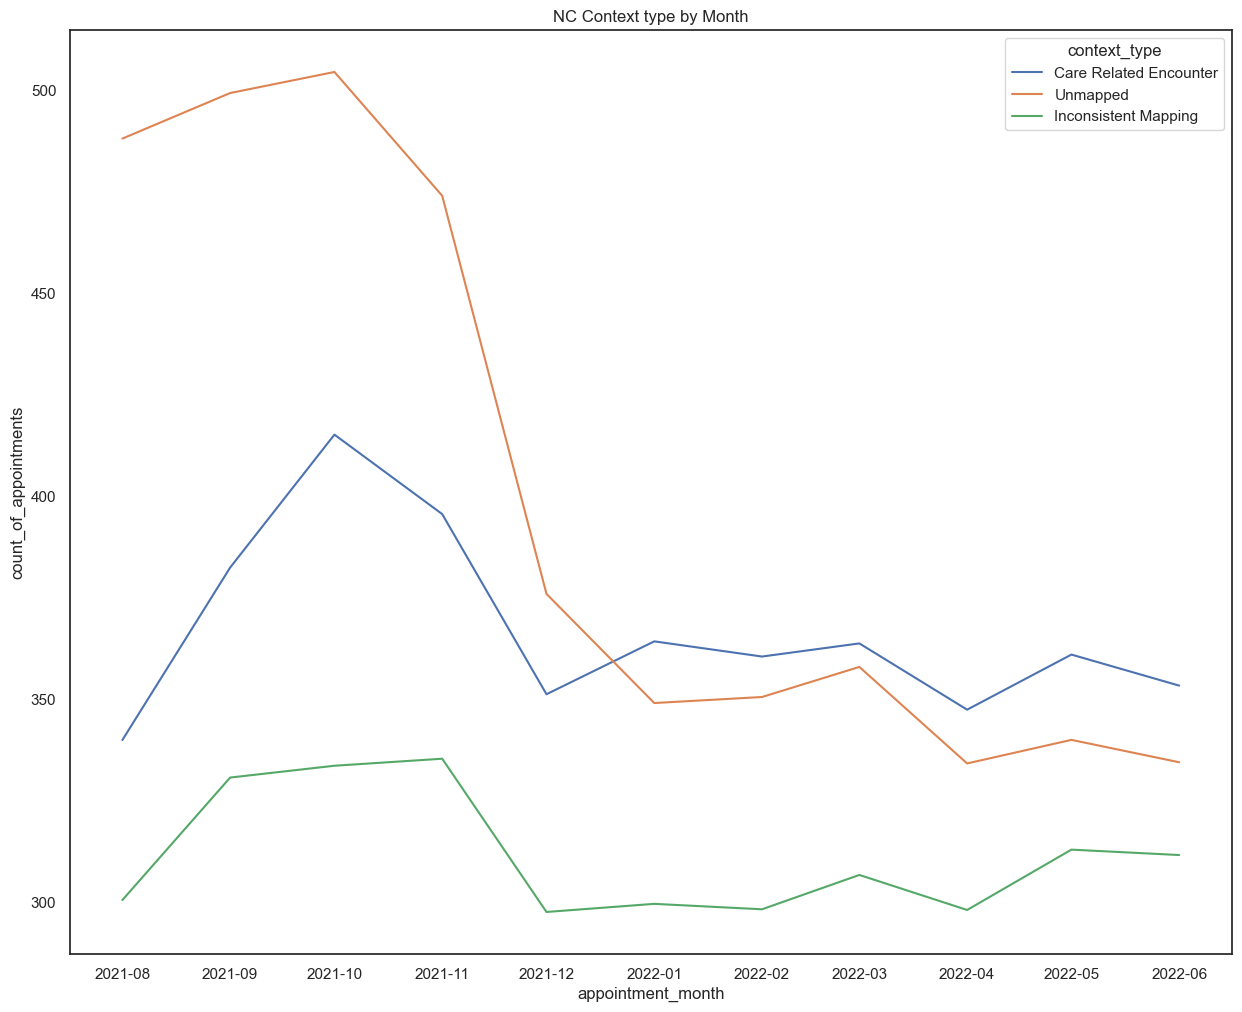

In [116]:
#Plot the appointments over the available date range, and review the context types for months.
#Create a lineplot.
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,}

#Creating lineplot
sns.lineplot(x='appointment_month',
             y='count_of_appointments',
             hue='context_type',
             data=nc_2,
             ci=None).set_title("NC Context type by Month")

C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\2675870704.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_month',


Text(0.5, 1.0, 'NC National Category by Month')

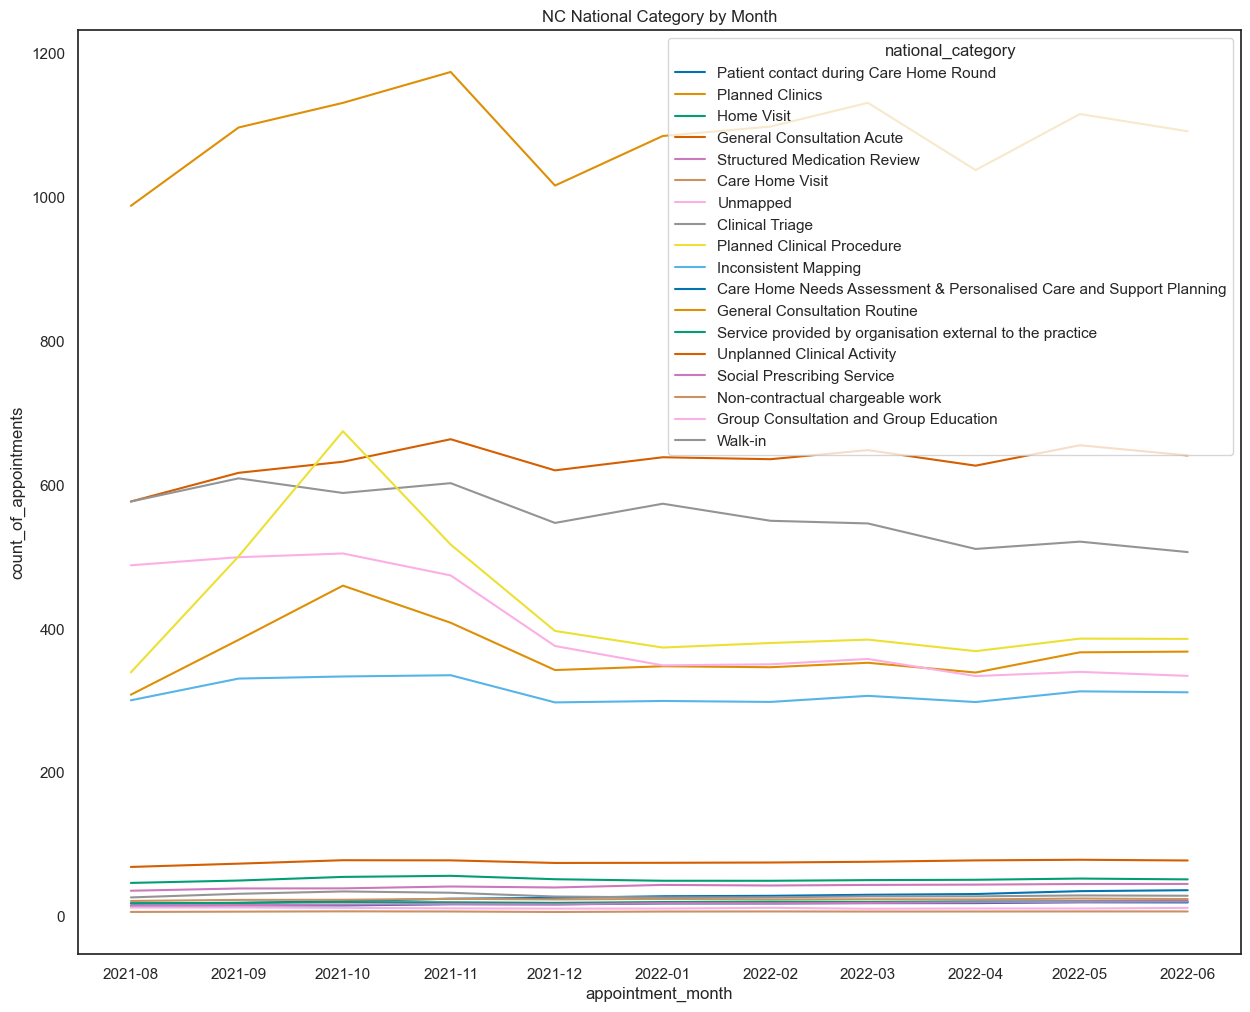

In [117]:
#Plot the appointments over the available date range, and review the national category for months.
#Create a lineplot.
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,}

#Creating lineplot
sns.lineplot(x='appointment_month',
             y='count_of_appointments',
             hue='national_category',
             data=nc_2,
             palette = 'colorblind',
             ci=None).set_title("NC National Category by Month")

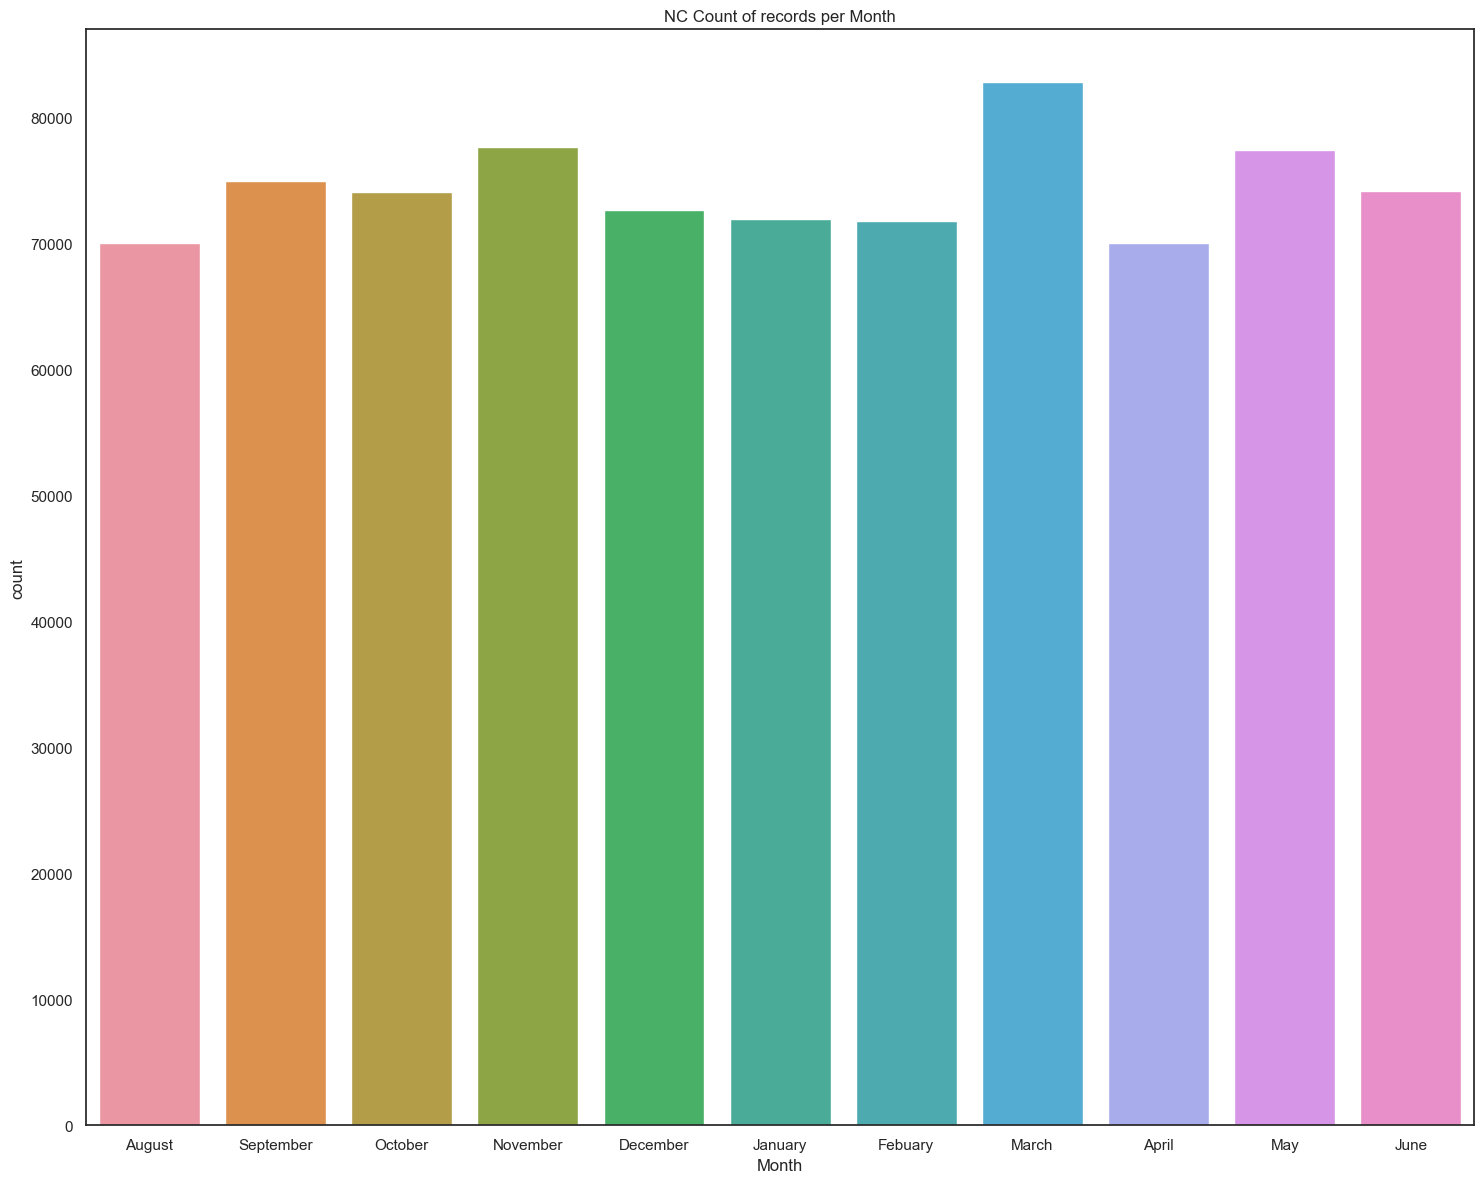

In [118]:
#Exploring count of records per month for nc dataFrame
#Converting 'appointment_date' column to datetime
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'], format='%m/%d/%Y')

# Assigning season for data in National_categories DataFrame
def get_month(month):
    if month == 8:
        return 'August'
    elif month == 9:
        return 'September'
    elif month == 10:
        return 'October'
    elif month == 11:
        return 'November'
    elif month == 12:
        return 'December'
    elif month == 1:
        return 'January'
    elif month == 2:
        return 'Febuary'
    elif month == 3:
        return 'March'
    elif month == 4:
        return 'April'
    elif month == 5:
        return 'May'
    elif month == 6:
        return 'June'
    else:
        return 'July'

#Extracting 'month' from date in nc DataFrame
nc['month'] = nc['appointment_date'].dt.month.map(get_month)

#Viewing the DataFrame
ax=sns.countplot(x='month', data=nc).set_title("NC Count of records per Month")

plt.tight_layout()
plt.xlabel('Month')

#Viewing the plot
plt.show()

Create four visualisations indicating the number of appointments for service setting per season.

In [119]:
#Converting 'appointment_date' column to datetime
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'], format='%m/%d/%Y')

#Function to determine the season for data in nc DataFrame
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

#Assigning a new column 'season' to nc DataFrame
nc['season'] = nc['appointment_date'].dt.month.map(get_season)

#View the DataFrame
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,month,season
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08-01,August,Summer
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08-01,August,Summer
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08-01,August,Summer
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08-01,August,Summer
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08-01,August,Summer
...,...,...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06-01,June,Summer
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06-01,June,Summer
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06-01,June,Summer
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06-01,June,Summer


C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\1716232911.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='season', y='count_of_appointments',


Text(0.5, 1.0, 'Service Setting All Seasons')

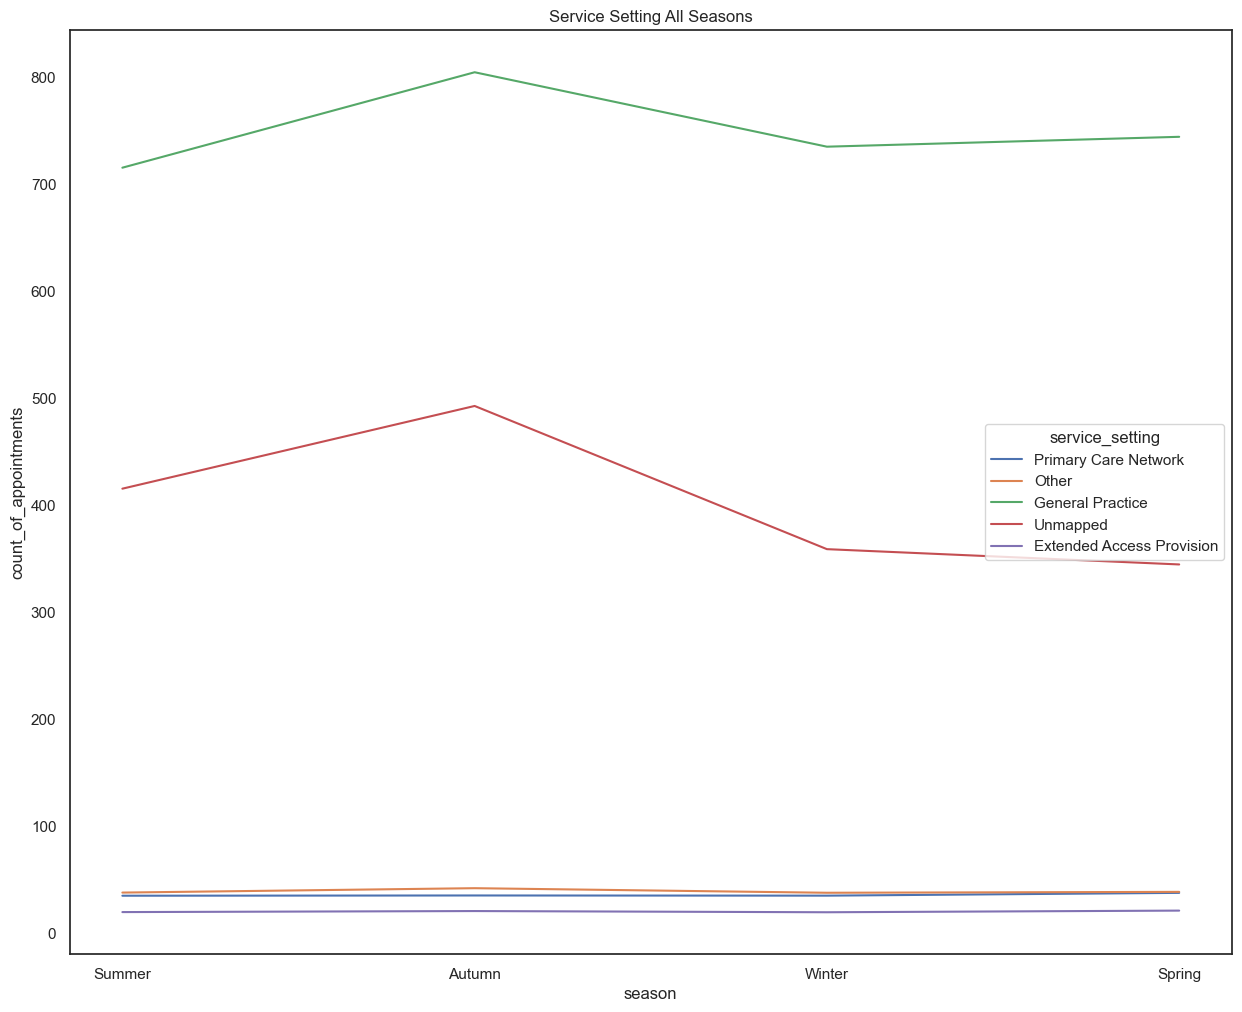

In [120]:
#Visualising the subset for service settings across all seasons using a lineplot
#Creating lineplot
sns.lineplot(x='season', y='count_of_appointments',
             hue='service_setting',
             data=nc,
            ci=None).set_title("Service Setting All Seasons")

C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\3019825624.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_date', y='count_of_appointments',


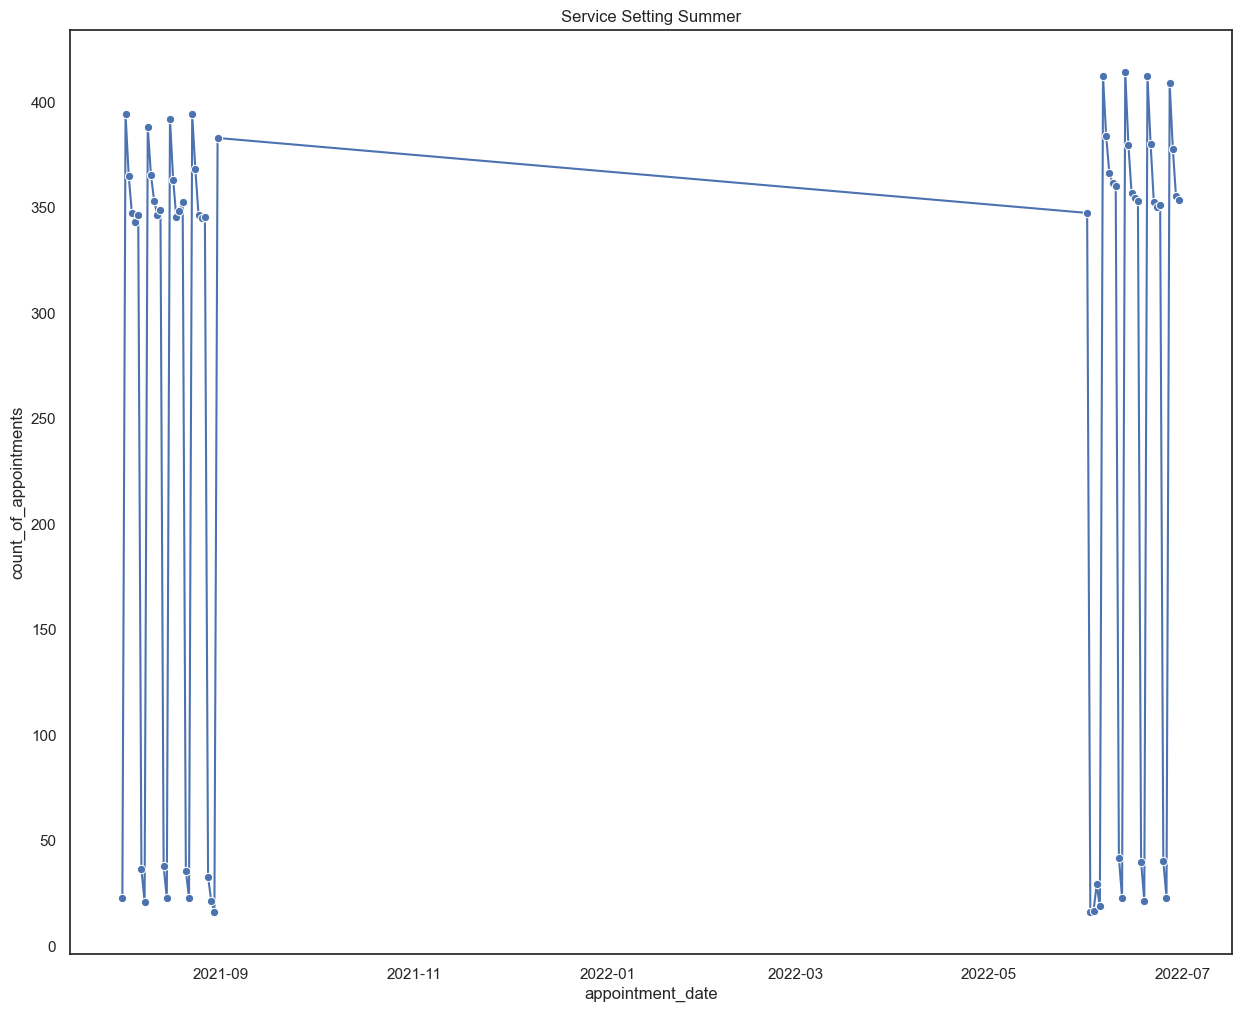

In [121]:
#Visualising the subset for service settings in Summer using a lineplot
nc_summer = nc[nc['season'] == 'Summer']

#Create a line plot for 'Summer'
sns.lineplot(x='appointment_date', y='count_of_appointments',
             data=nc_summer, marker='o',
            ci=None).set_title("Service Setting Summer")

#View the plot
plt.show()

C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\2366447068.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_date', y='count_of_appointments',


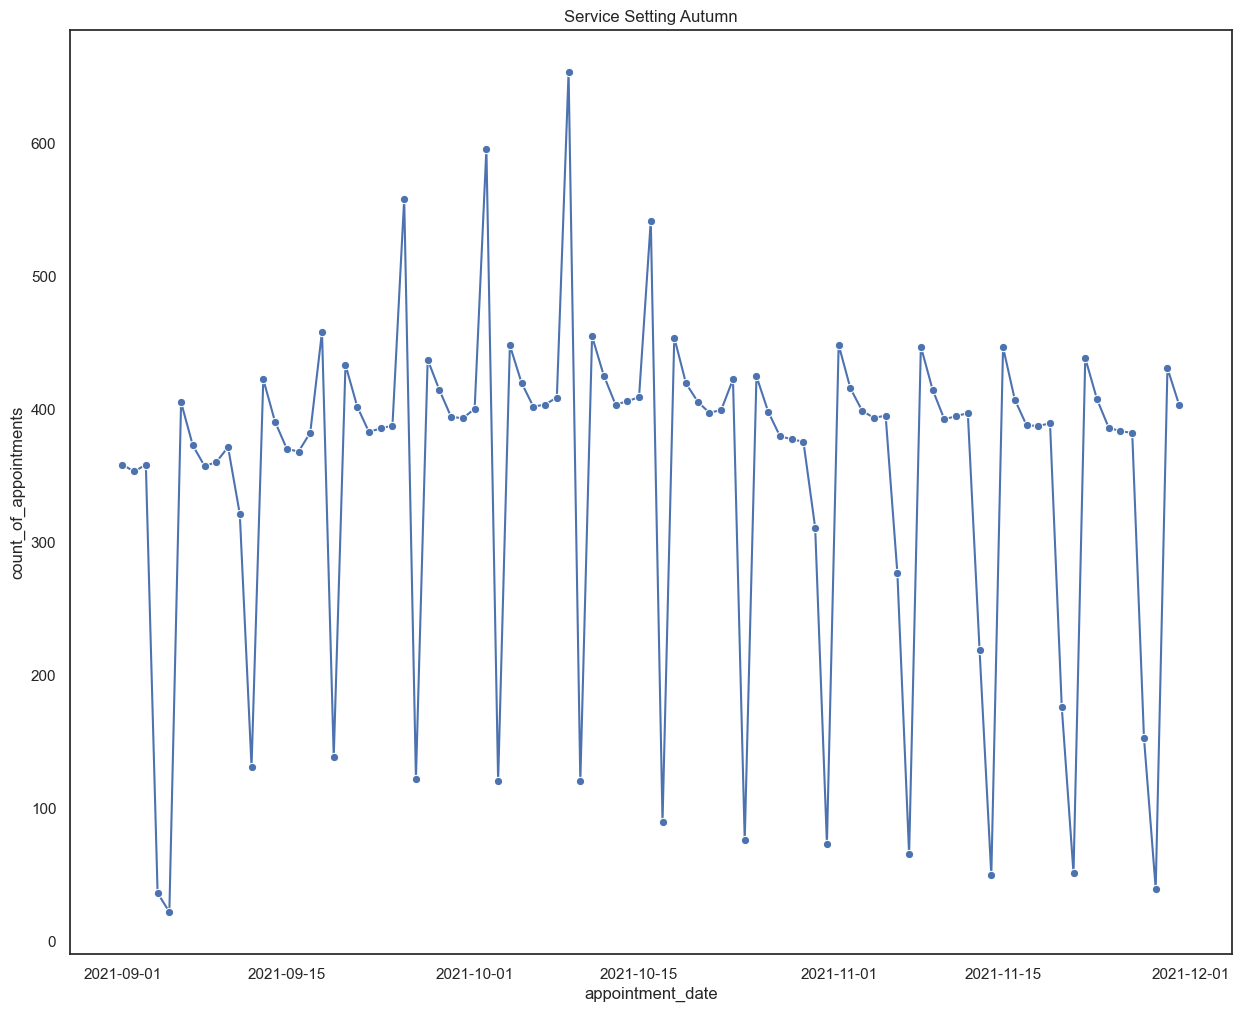

In [122]:
#Visualising the subset for service settings in Autumn using a lineplot
nc_autumn = nc[nc['season'] == 'Autumn']

#Create a line plot for 'Autumn'
sns.lineplot(x='appointment_date', y='count_of_appointments',
             data=nc_autumn, marker='o',
            ci=None).set_title("Service Setting Autumn")

#View the plot
plt.show()

C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\2270080183.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_date', y='count_of_appointments',


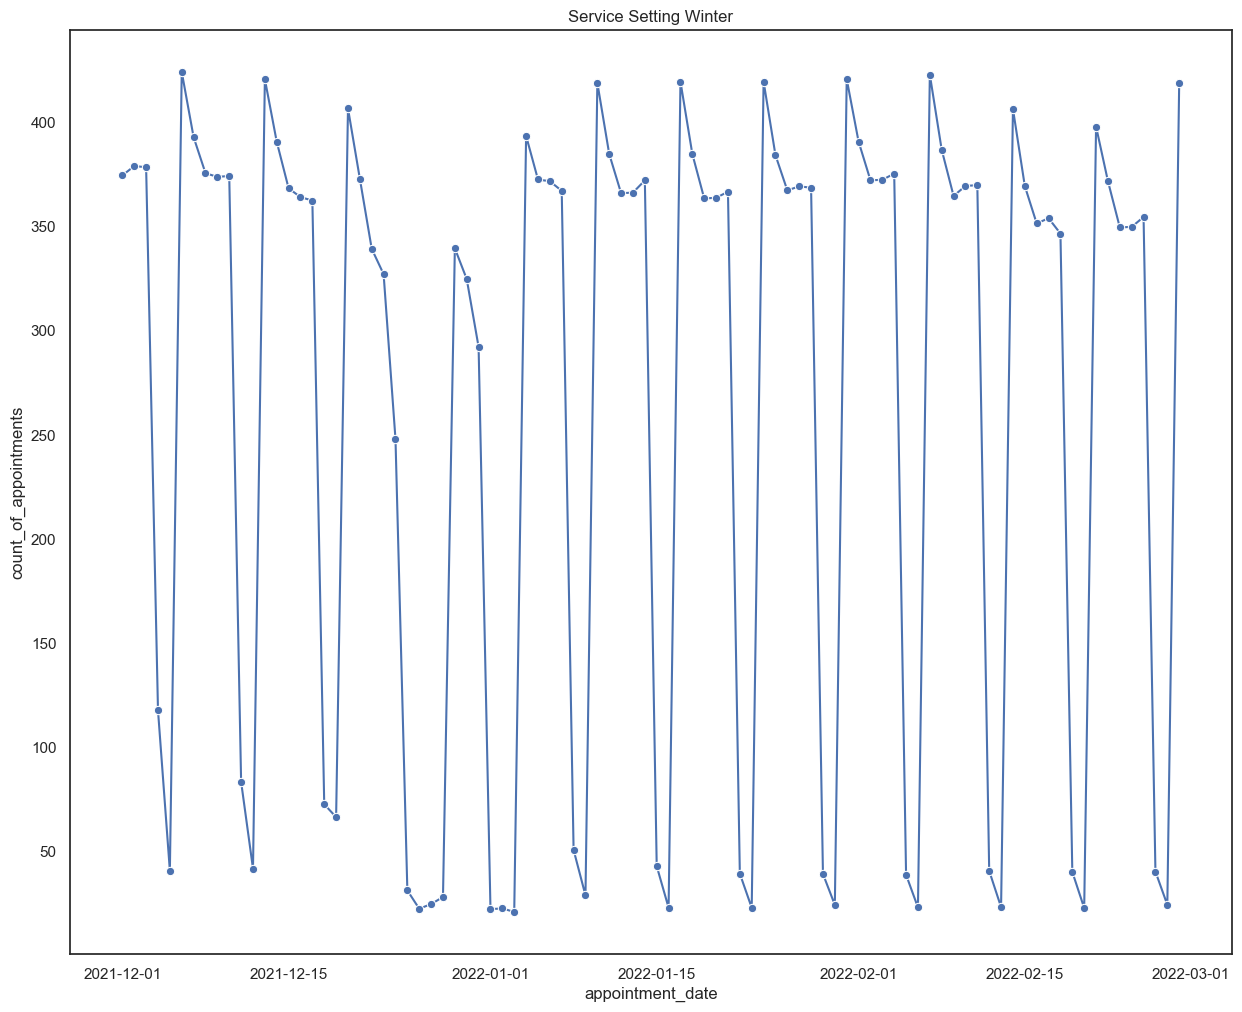

In [123]:
#Visualising the subset for service settings in Winter using a lineplot
nc_winter = nc[nc['season'] == 'Winter']

#Create a line plot for 'Winter'
sns.lineplot(x='appointment_date', y='count_of_appointments',
             data=nc_winter, marker='o',
            ci=None).set_title("Service Setting Winter")

#View the plot
plt.show()

C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\2278370156.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  y1=sns.lineplot(x='appointment_date', y='count_of_appointments',


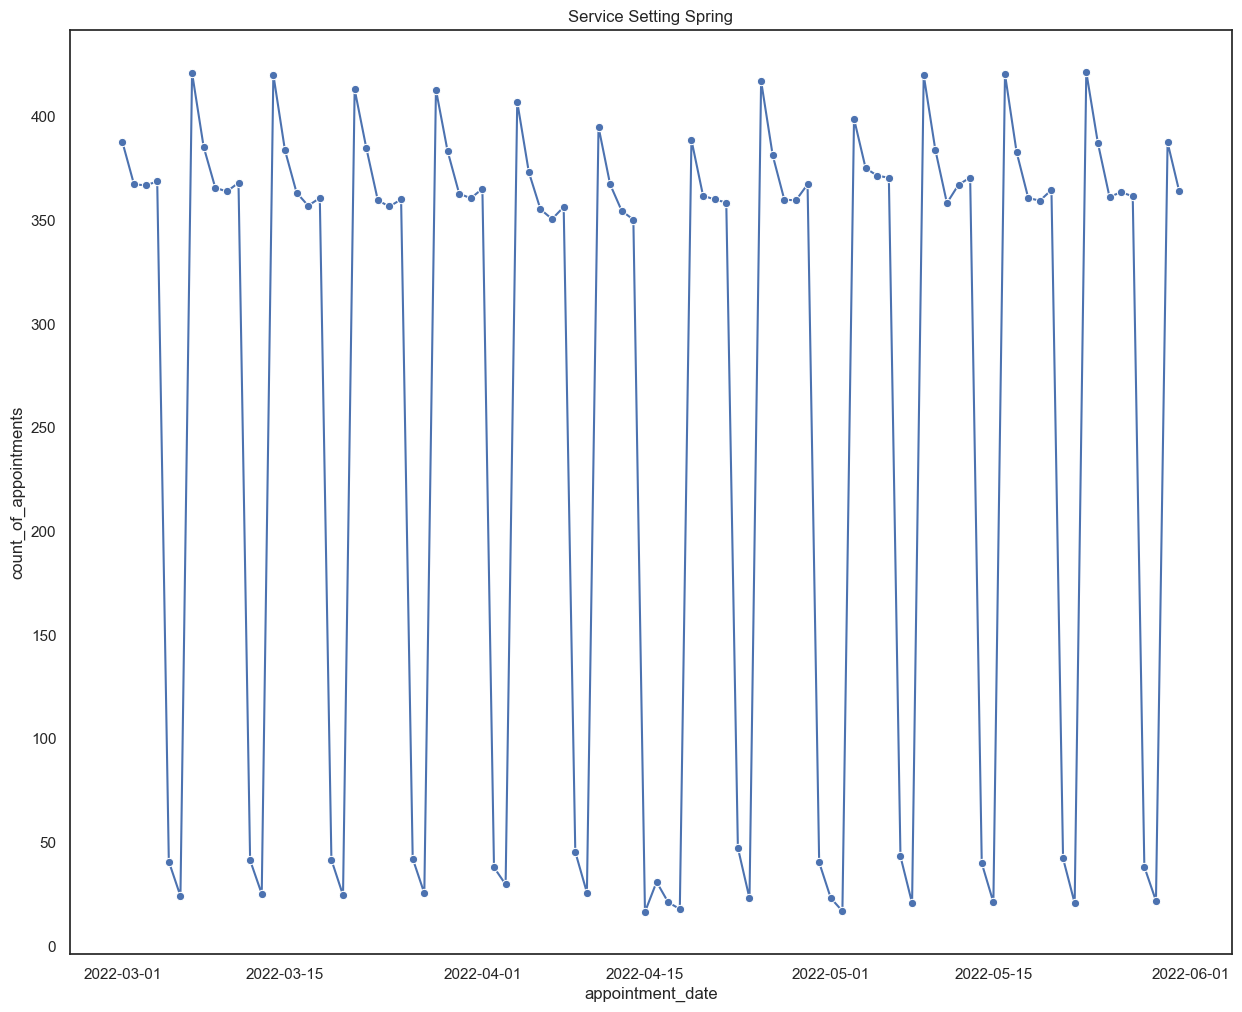

In [124]:
#Visualising the subset for service settings in Spring using a lineplot
nc_spring = nc[nc['season'] == 'Spring']

#Create a line plot for 'Spring'
y1=sns.lineplot(x='appointment_date', y='count_of_appointments',
                data=nc_spring, marker='o',
               ci=None).set_title("Service Setting Spring")

#View the plot
plt.show()

In [125]:
#Subsetting columns from appointments_regional to create new DataFrame with columns needed for further plotting
# and grouping by appointment_mode:
ar_2 = ar[['appointment_month', 'icb_ons_code', 'appointment_mode',
           'time_between_book_and_appointment', 'count_of_appointments']]\
.groupby('appointment_mode')

#View the result
print(ar_2)
ar_2.head()

,appointment_month,icb_ons_code,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2020-01-01,E54000034,Face-to-Face,1 Day,8107
1,2020-01-01,E54000034,Face-to-Face,15 to 21 Days,6791
2,2020-01-01,E54000034,Face-to-Face,2 to 7 Days,20686
3,2020-01-01,E54000034,Face-to-Face,22 to 28 Days,4268
4,2020-01-01,E54000034,Face-to-Face,8 to 14 Days,11971
7,2020-01-01,E54000034,Home Visit,1 Day,151
8,2020-01-01,E54000034,Home Visit,15 to 21 Days,12
9,2020-01-01,E54000034,Home Visit,2 to 7 Days,141
10,2020-01-01,E54000034,Home Visit,22 to 28 Days,4
11,2020-01-01,E54000034,Home Visit,8 to 14 Days,16


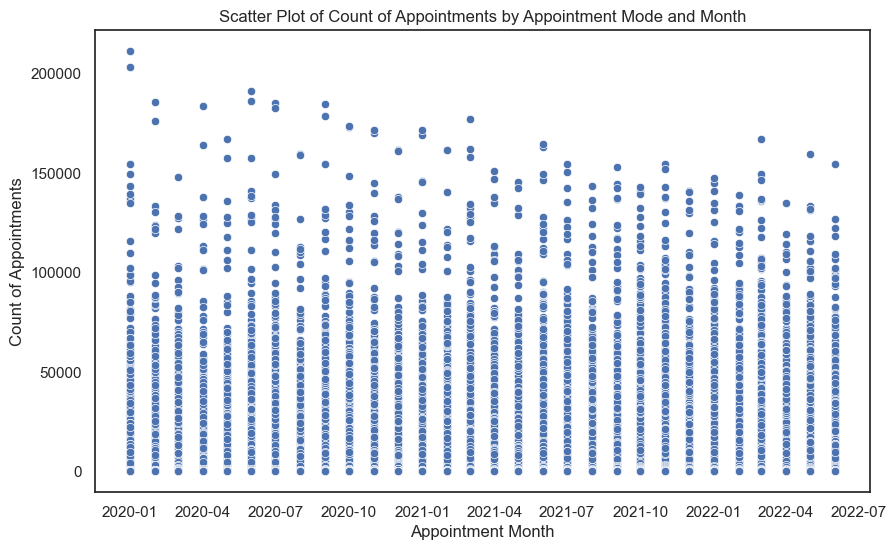

In [126]:
#Creating a scatterplot to see correlation of appointment_mode and appointment_month:
appointment_types = ['appointment_month', 'icb_ons_code', 'appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments']

#Creating a new DataFrame 'ar_2' with selected columns
ar_2 = ar[appointment_types]

#Creating a scatter plot using seaborn
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='appointment_month', y='count_of_appointments', data=ar_2)

#Setting plot labels and title
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.title('Scatter Plot of Count of Appointments by Appointment Mode and Month')

#View the plot
plt.show()

Scatterplot shows no correlation for these variables.

(20532, 5)


<Axes: xlabel='appointment_mode', ylabel='Count'>

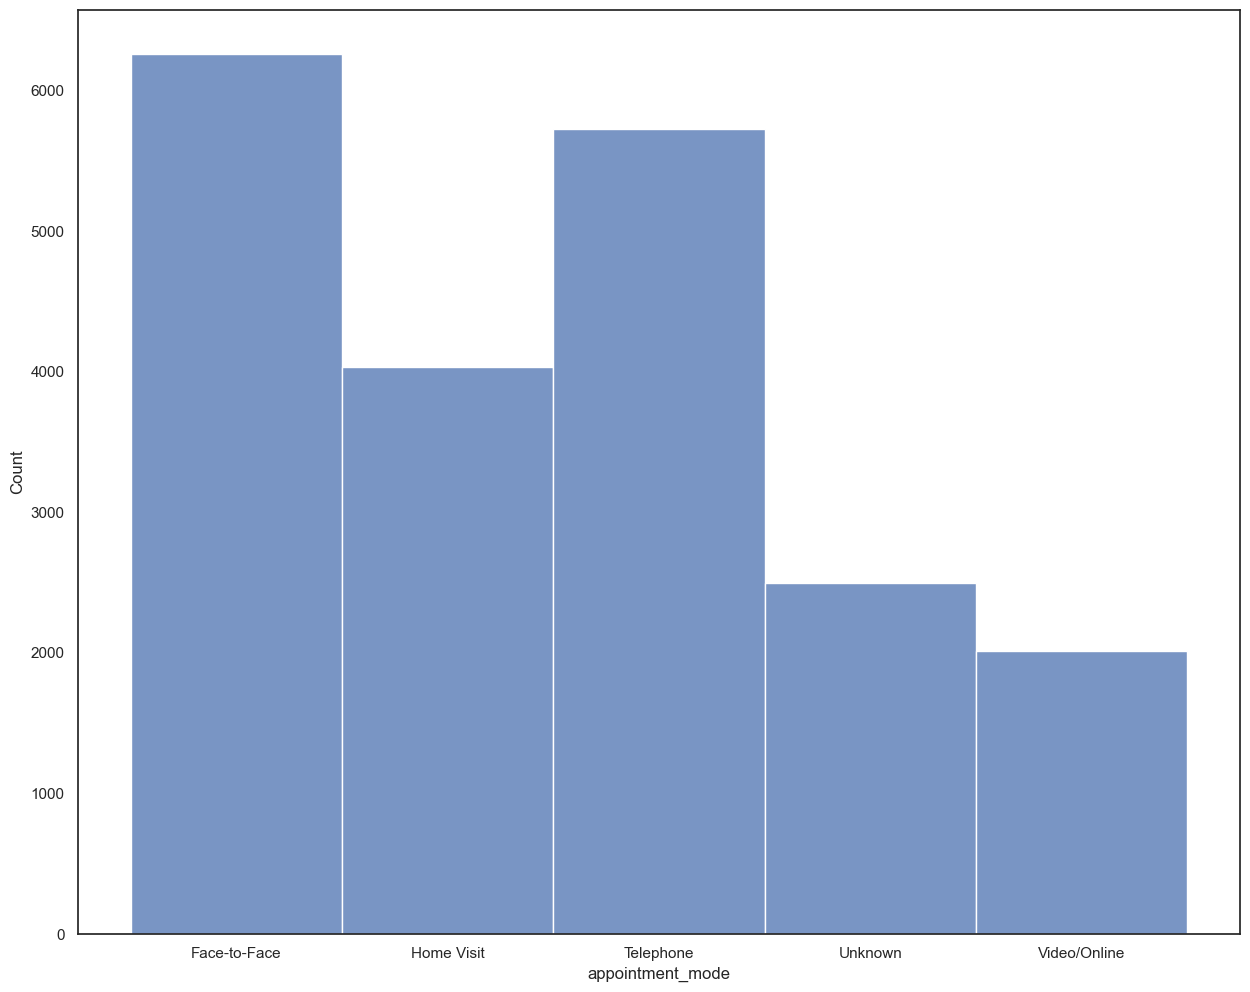

In [127]:
#Creating histagram based on appointments_regional DataFrame for March 2022
#to see what appointment mode is the most popular:
#Selecting January from appointments_regional DataFrame:
selected_month = ar_2[ar_2['appointment_month'].dt.to_period('M') == '2022-03']

#Viewing variable
print(selected_month.shape)
#Creating histagram
sns.histplot(data=selected_month, x='appointment_mode', binwidth=1)

<Axes: xlabel='appointment_mode', ylabel='Count'>

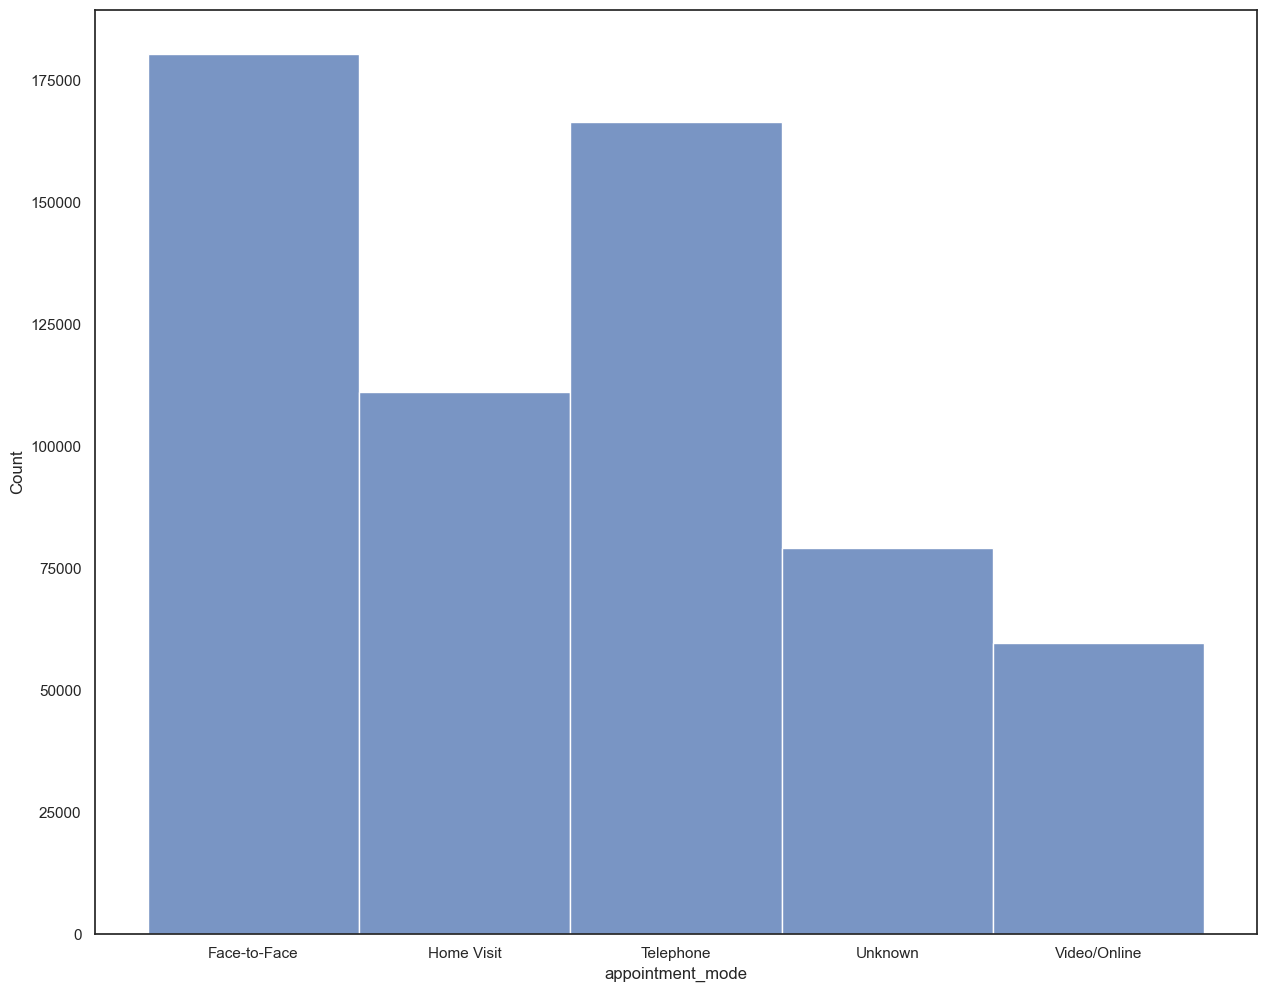

In [128]:
#Sense checking if the whole data set for appointment_regional represents the same trend
#for appointment modes:

#Creating histagram for whole ar_2 DataFrame:
sns.histplot(data=ar_2, x='appointment_mode', binwidth=1)

In [129]:
#Subsetting columns in actual_duration DataFrame to create new DataFrame with columns needed for further plotting
# and grouping by actual_duration:
ad_2 = ad[['icb_ons_code', 'appointment_date',
           'actual_duration', 'count_of_appointments']]

#Viewing the result:
print(ad_2)
ad_2.head()

       icb_ons_code appointment_date         actual_duration  \
0         E54000050       2021-12-01           31-60 Minutes   
1         E54000050       2021-12-01           21-30 Minutes   
2         E54000050       2021-12-01            6-10 Minutes   
3         E54000050       2021-12-01  Unknown / Data Quality   
4         E54000050       2021-12-01           16-20 Minutes   
...             ...              ...                     ...   
137788    E54000054       2022-06-30           31-60 Minutes   
137789    E54000054       2022-06-30           21-30 Minutes   
137790    E54000054       2022-06-30           16-20 Minutes   
137791    E54000054       2022-06-30           11-15 Minutes   
137792    E54000054       2022-06-30             1-5 Minutes   

        count_of_appointments  
0                         364  
1                         619  
2                        1698  
3                        1277  
4                         730  
...                       ...  
137788 

,icb_ons_code,appointment_date,actual_duration,count_of_appointments
0,E54000050,2021-12-01,31-60 Minutes,364
1,E54000050,2021-12-01,21-30 Minutes,619
2,E54000050,2021-12-01,6-10 Minutes,1698
3,E54000050,2021-12-01,Unknown / Data Quality,1277
4,E54000050,2021-12-01,16-20 Minutes,730


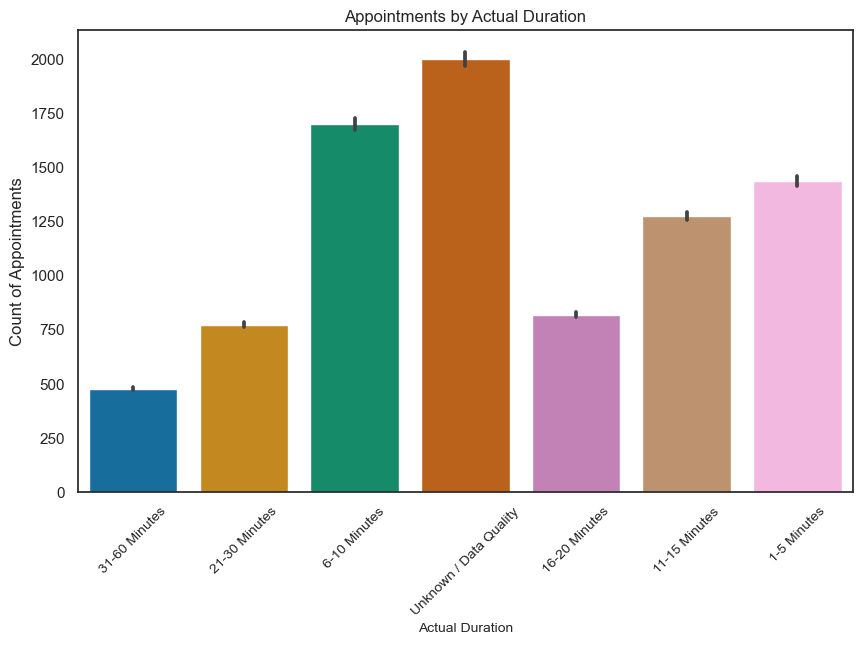

In [130]:
#Creating visualisation for count of appointments by actual duration from ar_2 DataFrame
#to check how long are appointments on average:

# Creating barplot for actual duration:
plt.figure(figsize=(10, 6))
sns.barplot(x='actual_duration', y='count_of_appointments', data=ad_2, palette='colorblind')
plt.xlabel('Actual Duration', fontsize=10)
plt.ylabel('Count of Appointments')
plt.title('Appointments by Actual Duration')

# Adjusting x-tick label font size and rotation
plt.xticks(fontsize=10, rotation=45) 

plt.show()

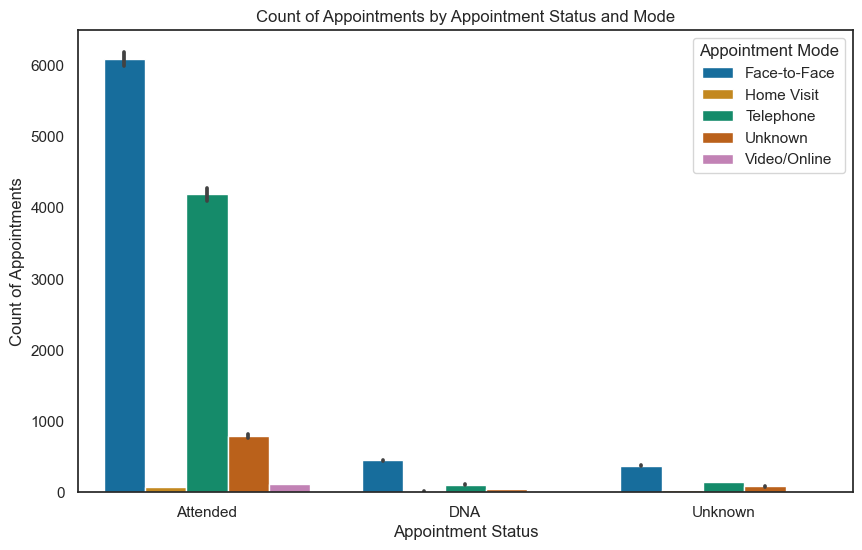

In [131]:
#Checking how many apointments in each appointment mode 
#were attended vs. not attended by using appointments regional DataFrame

#Creating barplot:
plt.figure(figsize=(10, 6))
sns.barplot(x='appointment_status', y='count_of_appointments'
            , hue='appointment_mode',
            data=ar, palette='colorblind')

plt.xlabel('Appointment Status')
plt.ylabel('Count of Appointments')
plt.title('Count of Appointments by Appointment Status and Mode')
plt.legend(title='Appointment Mode', bbox_to_anchor=(1, 1))

plt.show()

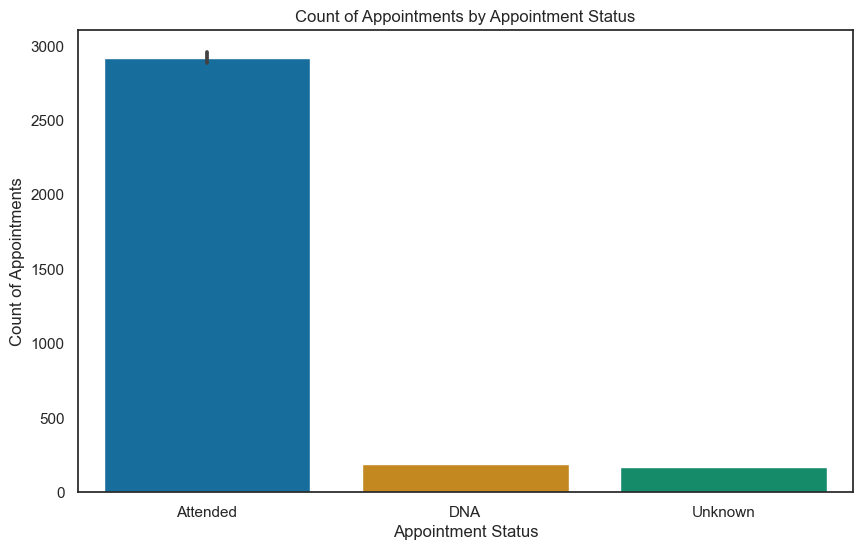

In [132]:
#Creating visualisation to show only count of appointments by status from appointments regional DataFrame:

plt.figure(figsize=(10, 6))
sns.barplot(x='appointment_status',
            y='count_of_appointments',
            hue=None, data=ar, palette='colorblind')

plt.xlabel('Appointment Status')
plt.ylabel('Count of Appointments')
plt.title('Count of Appointments by Appointment Status')
plt.show()

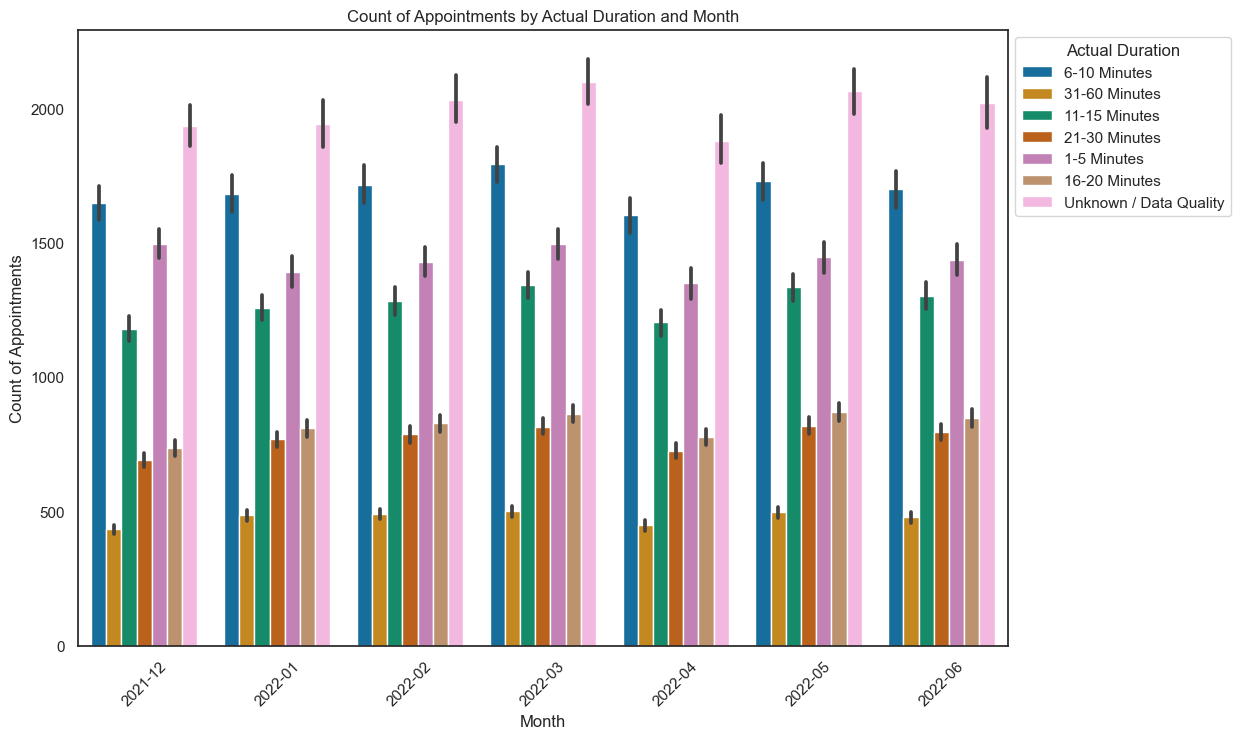

In [133]:
#Checking volumes for each duration of appointments per month to see if there is a pattern
#in lenght of appointments in particular month
#from actual_duration DataFrame

# Converting 'appointment_date' to datetime format to extract the month
ad['month'] = pd.to_datetime(ad['appointment_date']).dt.to_period('M')

# Sorting the DataFrame by 'count_of_appointments' within each 'month'
ad_sorted = ad.sort_values(by=['month', 'count_of_appointments'])

#Creating barplot to visualise patterns:
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='count_of_appointments',
            hue='actual_duration',
            data=ad_sorted, palette='colorblind')

plt.xlabel('Month')
plt.ylabel('Count of Appointments')
plt.title('Count of Appointments by Actual Duration and Month')
plt.xticks(rotation=45)  
plt.legend(title='Actual Duration', bbox_to_anchor=(1, 1))

plt.show()

In [134]:
#Creating season column for appointment_regional to then visualise data by seaon
# Converting 'appointment_month' column to datetime
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%m/%d/%Y')

# Assigning season for data in appointments_regional DataFrame
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

#Mapping column 'season' to DataFrame
ar['season'] = nc['appointment_month'].dt.month.map(get_season)

#Viewing the DataFrame
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,season
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107,Summer
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,Summer
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,Summer
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,Summer
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,Summer
...,...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21,Winter
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8,Winter
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28,Winter
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17,Winter


In [135]:
#Grouping by 'season' and 'appointment_status', and calculate the count of appointments
grouped_counts = ar.groupby(['season', 'appointment_status']).size().reset_index(name='count_of_appointments')

#Creating a pivot table to organize the counts
attendance_by_season = pd.pivot_table(grouped_counts, values='count_of_appointments',
                                      index='season',
                                      columns='appointment_status')

#Presenting results for seasonal attendance as percentages
#Pivoting table and converting to percentage values
attendance_percentage = attendance_by_season.div(attendance_by_season.sum(axis=1), axis=0) * 100

#Viewing the resulting DataFrame
print(attendance_percentage)

appointment_status   Attended        DNA    Unknown
season                                             
Autumn              39.109014  27.289197  33.601789
Spring              38.793016  27.558796  33.648188
Summer              38.766725  27.161890  34.071385
Winter              38.863774  27.401049  33.735177


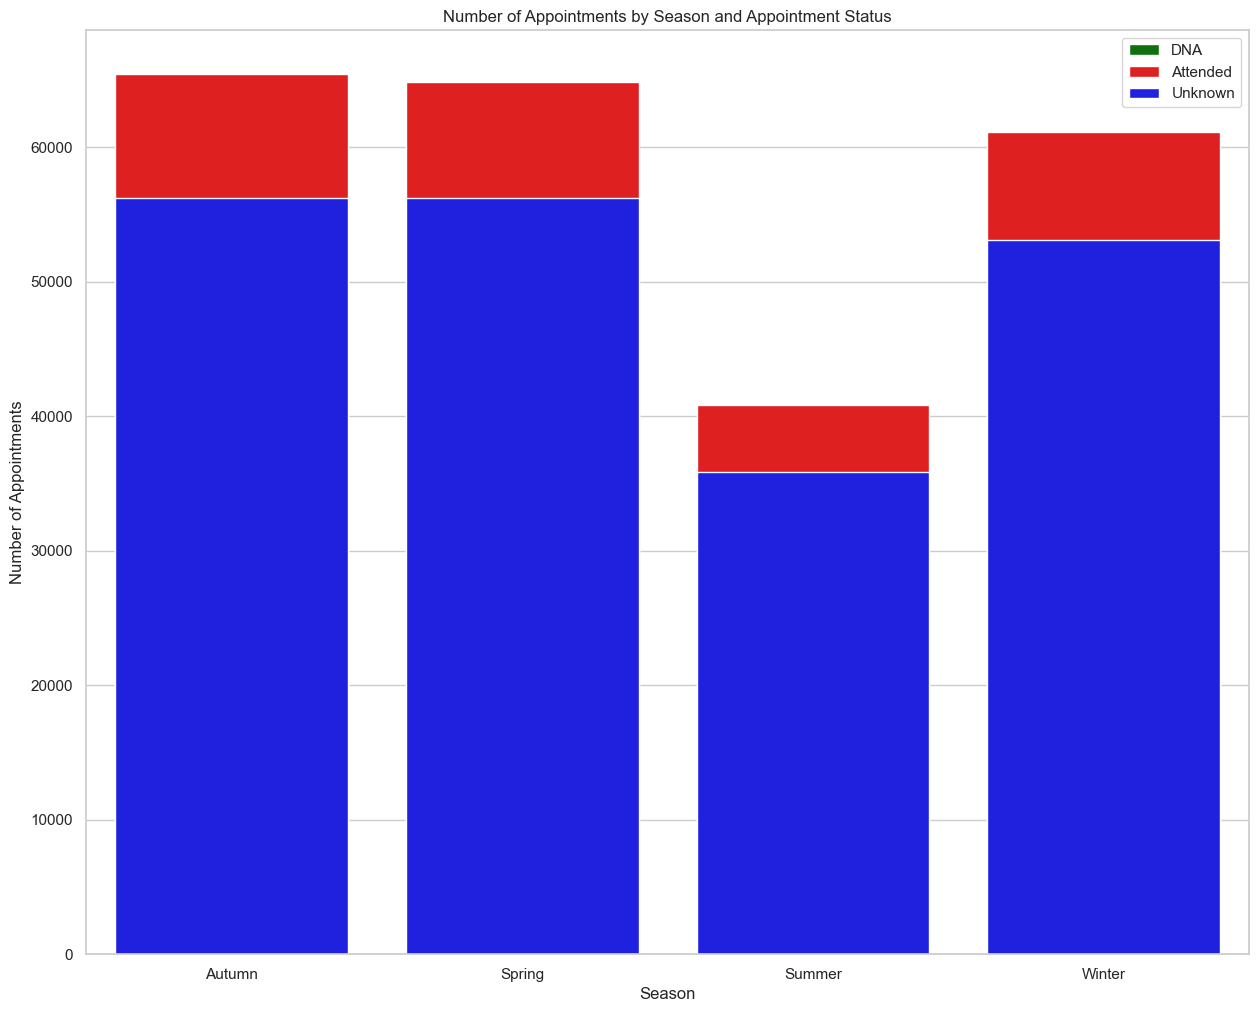

In [169]:
#Plotting appointment_status data to barplot
sns.barplot(x=attendance_by_season.index, y=attendance_by_season['DNA'], label='DNA', color='green')
sns.barplot(x=attendance_by_season.index, y=attendance_by_season['Attended'], label='Attended', color='red')
sns.barplot(x=attendance_by_season.index, y=attendance_by_season['Unknown'], label='Unknown', color='blue')

plt.title('Number of Appointments by Season and Appointment Status')
plt.xlabel('Season')
plt.ylabel('Number of Appointments')
plt.legend()
plt.show()

DNA data is not picked up by plot - this needs to be fixed.

In [170]:
#Calculating the total count for each appointment_mode
total_counts = ar['appointment_status'].value_counts()

#Calculating the percentage for 'Attended', 'DNA', and 'Unknown'
percentage_attended = total_counts.get('Attended', 0) / len(ar) * 100
percentage_dna = total_counts.get('DNA', 0) / len(ar) * 100
percentage_unknown = total_counts.get('Unknown', 0) / len(ar) * 100

#Viewing the results
print(f"Percentage of Attended: {percentage_attended:.2f}%")
print(f"Percentage of DNA: {percentage_dna:.2f}%")
print(f"Percentage of Unknown: {percentage_unknown:.2f}%")

Percentage of Attended: 38.90%
Percentage of DNA: 27.37%
Percentage of Unknown: 33.73%


Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [138]:
#Importing visualisation Libraries and settings graph styel for analysis.
import pandas as pd
import seaborn as sns

#Setting the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

#Setting the plot style as white.
sns.set_style('white')

#Maximum column width to display.
pd.options.display.max_colwidth = 200

In [139]:
#Loading tweets csv to DataFrame
tweets = pd.read_csv('tweets.csv')

#Viewing data frame:
print(tweets.shape)
print(tweets.dtypes)
print(tweets.columns)

tweets.head()

(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [140]:
#Reviewing metadata and descriptive statistics.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [141]:
# Checking retweeted and favourite tweet messages to explore most popular tweet trends
# Creating a DataFrame with to ten favourite and retweeted messages

top_tweets = tweets.groupby('tweet_full_text')[['tweet_retweet_count', 'tweet_favorite_count']].sum()

top_ten_tweets = top_tweets.sum(axis=1).sort_values(ascending=False).head(10)

#Viewing results
print("Top ten favorite and retweeted messages:")
print(top_ten_tweets)

Top ten favorite and retweeted messages:
tweet_full_text
RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…        3117
RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” Now, provincial governments are pushing priva…         801
RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…     600
RT @healthcare_NFT_: Really excited to be working with @TheGivingBlock on what is proving to be a historic campaign. #HealthCare Heroes are…         365
RT @CURE_Ecosystem: EXCLUSIVE footage. Just for our supporters. Who wants a first look at the Car? 👀 VROOM. NASCAR.. here we come!!\n\n#RACE4…       315
RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…      303
RT @JeffWaltersSask: A go

In [142]:
#Creating a new DataFrame containing only the text
tweet_text = pd.DataFrame(tweets[['tweet_full_text', 'tweet_entities_hashtags']])

#Viewing DataFrame
tweet_text

,tweet_full_text,tweet_entities_hashtags
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...",#Healthcare
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"#PremiseHealth, #hiring"
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,#Healthcare
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,#NEW
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare"
...,...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"#Innovation, #precisionFabrication, #Microfluidic"
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","#SKPoli, #healthcare"
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","#webinar, #ESG, #healthcare"
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC,"#bpt, #physiotherapy, #HealthyNation, #healthcare, #medicalcare, #csjmu"


In [143]:
#Extracting hashtags and create a list
hashtags_list = [hashtags.split() if isinstance(hashtags, str)\
                 else [] for hashtags in tweet_text['tweet_entities_hashtags']]

#Looping through the messages, and create a list of values containing the # symbol
filtered_hashtags = [tag for tags in hashtags_list for tag in tags if '#' in tag]

#Viewing the first 30 records.
print(filtered_hashtags[:30])

['#Healthcare', '#PremiseHealth,', '#hiring', '#Healthcare', '#NEW', '#blogs,', '#digitaltransformation,', '#cybersecurity,', '#accounting,', '#finance,', '#healthcare', '#firstcoastcna,', '#cnaexam,', '#cnaexampreparation,', '#jacksonville,', '#cnatraining,', '#nurse,', '#nursing,', '#nurselife,', '#nursepractitioner,', '#nurseproblems,', '#nursingschool,', '#healthcare', '#NEW,', '#disparities,', '#healthcare,', '#alert,', '#insurance,', '#data', '#Healthcare']


In [144]:
tweets = pd.DataFrame(tweets)  
#Searching DataFrame for where'tweet_retweet_count' is larger than 10
top_retweet = tweets.loc[(tweets['tweet_retweet_count'] > 10)] 
                             
#Viewing DataFrame
top_retweet

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
27,1567581274088566785,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",207,0,False,False,en
28,1567581257823027201,"RT @SoniaFurstenau: People in BC are dying of COVID, and more and more are enduring the serious impacts of long COVID. We are seeing the im…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SoniaFurstenau', 'name': 'Sonia Furstenau', 'id': 2358617670, 'id_str': '2358617670', 'indices': [3, 18]}], 'urls': []}",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",40,0,False,False,en
37,1567580952779522048,RT @imedverse: Crohn's Disease\n\n@ManualOMedicine @imedverse #internalmedicine #TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medica…,"{'hashtags': [{'text': 'internalmedicine', 'indices': [60, 77]}, {'text': 'TipsForNewDocs', 'indices': [78, 93]}, {'text': 'MedEd', 'indices': [94, 100]}, {'text': 'MedTwitter', 'indices': [101, 1...","#internalmedicine, #TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical","{'iso_language_code': 'en', 'result_type': 'recent'}",11,0,False,False,en
38,1567580783598075905,"RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” Now, provincial governments are pushing priva…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ricochet_en', 'name': 'Ricochet Media', 'id': 2280019405, 'id_str': '2280019405', 'indices': [3, 15]}], 'urls': []}",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",72,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1149,1567584406688206848,RT @imedverse: Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalP…,"{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [37, 52]}, {'text': 'MedEd', 'indices': [53, 59]}, {'text': 'MedTwitter', 'indices': [60, 71]}, {'text': 'medicine', 'indices': [72, 81]}, {'tex...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed","{'iso_language_code': 'en', 'result_type': 'recent'}",12,0,False,False,en
1156,1567583855422611461,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...,"{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [22, 37]}, {'text': 'MedEd', 'indices': [38, 44]}, {'text': 'MedTwitter', 'indices': [45, 56]}, {'text': 'medicine', 'indices': [57, 66]}, {'tex...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",12,42,False,False,en
1159,1567583678129393665,"RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” Now, provincial governments are pushing priva…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ricochet_en', 'name': 'Ricochet Media', 'id

In [145]:
#Searching DataFrame for where'tweet_favorite_count' are larger than 10:
top_favourite = tweets.loc[(tweets['tweet_favorite_count'] > 10)]

#Viewing DataFrame
top_favourite

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
9,1567582427719282689,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥,"{'hashtags': [{'text': 'Healthcare', 'indices': [33, 44]}], 'symbols': [{'text': 'JCO', 'indices': [14, 18]}, {'text': 'DAG', 'indices': [76, 80]}], 'user_mentions': [{'screen_name': '_JennyCo', '...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",1,28,False,False,en
84,1567579049043832832,"Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...","{'hashtags': [{'text': 'healthcare', 'indices': [22, 33]}, {'text': 'cdnpoli', 'indices': [270, 278]}], 'symbols': [], 'user_mentions': [], 'urls': []}","#healthcare, #cdnpoli","{'iso_language_code': 'en', 'result_type': 'recent'}",4,18,False,False,en
119,1567577266162475011,"More data that our 13+ 🇨🇦 #healthcare systems fall short of providing adequate access to care, even for those w/ a family physician.\n\nInstead of siloed solutions and further system fragmentation...","{'hashtags': [{'text': 'healthcare', 'indices': [26, 37]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/eZkz5brcYT', 'expanded_url': 'https://www.ctvnews.ca/health/canadians...",#healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",4,14,False,False,en
342,1567643206480699392,September is #WomenInMedicine Month! Thrilled to join @JulieSilverMD #SheLeadsHealthcare @ELAMProgram &amp; @AMWADoctors to #InvestInHer!\n\nI #InvestInHer to diversify the #healthcare #leadersh...,"{'hashtags': [{'text': 'WomenInMedicine', 'indices': [13, 29]}, {'text': 'SheLeadsHealthcare', 'indices': [70, 89]}, {'text': 'InvestInHer', 'indices': [126, 138]}, {'text': 'InvestInHer', 'indice...","#WomenInMedicine, #SheLeadsHealthcare, #InvestInHer, #InvestInHer, #healthcare, #leadership, #racialequity, #genderequity, #MedTwitter, #HeForShe","{'iso_language_code': 'en', 'result_type': 'recent'}",8,11,False,False,en
442,1567634936341069826,How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb,"{'hashtags': [{'text': 'comedy', 'indices': [31, 38]}, {'text': 'adulting', 'indices': [39, 48]}, {'text': 'healthcare', 'indices': [49, 60]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'med...","#comedy, #adulting, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",5,20,False,False,en
758,1567611240024875008,Looking forward to speaking at #ConV2X on Sep 15! Ping me for a speaker discount if interested! Register at https://t.co/v20ebbXmdO \n\n.@BHTYjournal @hedera @acoerco\n#blockchain #DLT #healthcare...,"{'hashtags': [{'text': 'ConV2X', 'indices': [31, 38]}, {'text': 'blockchain', 'indices': [165, 176]}, {'text': 'DLT', 'indices': [177, 181]}, {'text': 'healthcare', 'indices': [182, 193]}, {'text'...","#ConV2X, #blockchain, #DLT, #healthcare, #innovation","{'iso_language_code': 'en', 'result_type': 'recent'}",3,13,False,False,en
1098,1567587492949286912,@CapricornFMNews We have waiting to hear this kind of news now Sa is getting things correct there is absolutely nothing mahala #HealthCare services in SA must be paid by foreign nationals and loca...,"{'hashtags': [{'text': 'HealthCare', 'indices': [127, 138]}], 'symbols': [], 'user_mentions': [{'screen_name': 'CapricornFMNews', 'name': 'CapricornFM News', 'id': 1481829344, 'id_str': '148182934...",#HealthCare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,12,False,False,en
1122,1567586306607423488,"Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStude...","{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [64, 79]}, {'text': 'MedEd',

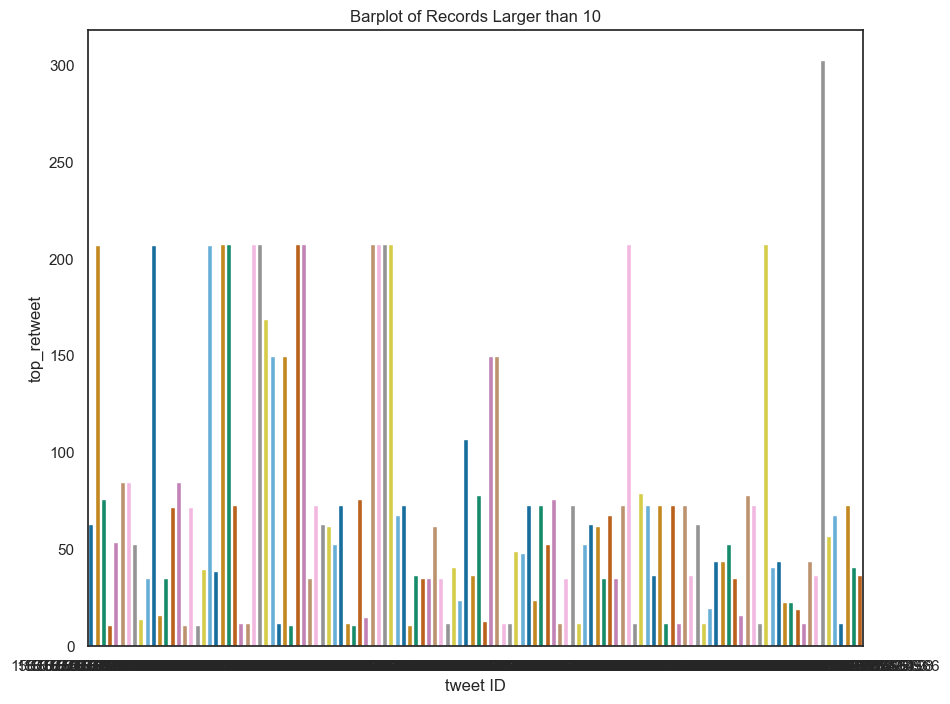

In [146]:
#Creating a Seaborn barplot displaying records with a count larger than 10
#Creating a barplot using
plt.figure(figsize=(10, 8))
sns.barplot(x=top_retweet.tweet_id, y='tweet_retweet_count', data=top_retweet, palette='colorblind')


#Adding labels and title 
plt.xlabel('tweet ID')
plt.ylabel('top_retweet')
plt.title('Barplot of Records Larger than 10')

#Viewing the plot
plt.show()

In [147]:
#Creating an alternative DataFrame to show tweets only with record above 10
df = pd.DataFrame(tweets)

#Filtering results > 10
filtered_df = df[(df['tweet_retweet_count'] > 10) | (df['tweet_favorite_count'] > 10)]

#Viewing data
filtered_df

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
9,1567582427719282689,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥,"{'hashtags': [{'text': 'Healthcare', 'indices': [33, 44]}], 'symbols': [{'text': 'JCO', 'indices': [14, 18]}, {'text': 'DAG', 'indices': [76, 80]}], 'user_mentions': [{'screen_name': '_JennyCo', '...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",1,28,False,False,en
27,1567581274088566785,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",207,0,False,False,en
28,1567581257823027201,"RT @SoniaFurstenau: People in BC are dying of COVID, and more and more are enduring the serious impacts of long COVID. We are seeing the im…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SoniaFurstenau', 'name': 'Sonia Furstenau', 'id': 2358617670, 'id_str': '2358617670', 'indices': [3, 18]}], 'urls': []}",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",40,0,False,False,en
37,1567580952779522048,RT @imedverse: Crohn's Disease\n\n@ManualOMedicine @imedverse #internalmedicine #TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medica…,"{'hashtags': [{'text': 'internalmedicine', 'indices': [60, 77]}, {'text': 'TipsForNewDocs', 'indices': [78, 93]}, {'text': 'MedEd', 'indices': [94, 100]}, {'text': 'MedTwitter', 'indices': [101, 1...","#internalmedicine, #TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical","{'iso_language_code': 'en', 'result_type': 'recent'}",11,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1149,1567584406688206848,RT @imedverse: Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalP…,"{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [37, 52]}, {'text': 'MedEd', 'indices': [53, 59]}, {'text': 'MedTwitter', 'indices': [60, 71]}, {'text': 'medicine', 'indices': [72, 81]}, {'tex...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed","{'iso_language_code': 'en', 'result_type': 'recent'}",12,0,False,False,en
1156,1567583855422611461,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...,"{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [22, 37]}, {'text': 'MedEd', 'indices': [38, 44]}, {'text': 'MedTwitter', 'indices': [45, 56]}, {'text': 'medicine', 'indices': [57, 66]}, {'tex...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",12,42,False,False,en
1159,1567583678129393665,"RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” Now, provincial governments are pushing priva…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ricochet_en', 'name': 'Ricochet Media', 'id': 2280019405, 'id_str': '22800194

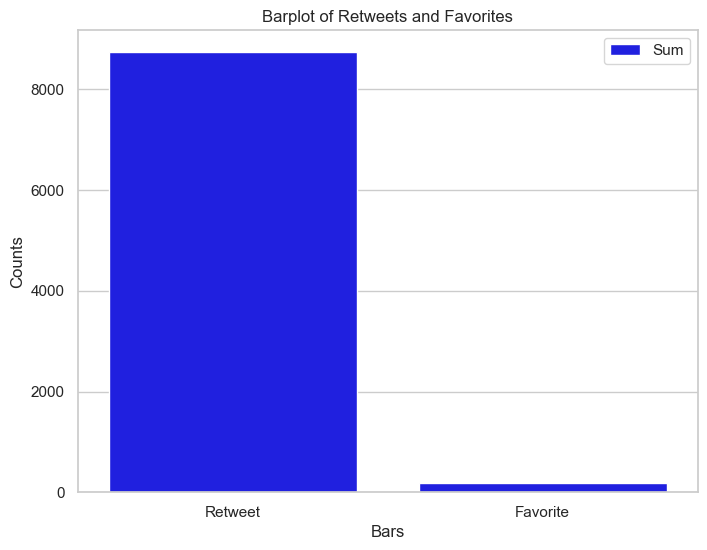

In [148]:
#Creating barplot to show tweets only with record above 10
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x=['Retweet', 'Favorite'], y=[filtered_df['tweet_retweet_count'].sum(),\
                                          filtered_df['tweet_favorite_count'].sum()],\
            color='blue', label='Sum')


#Adding labels and title
plt.xlabel('Bars')
plt.ylabel('Counts')
plt.title('Barplot of Retweets and Favorites')

#Adding legend
plt.legend()

#Showing the plot
plt.show()

Investigate the main concerns posed by the NHS.

In [149]:
#Loading the appointments_regional.csv file
#Vewing the DataFrame

ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,season
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107,Summer
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,Summer
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,Summer
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,Summer
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,Summer


In [150]:
#Printing the min and max dates in ar DataFrame
#Converting 'appointment_month' from string to datetime:
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

#Finding the minimum and maximum dates
min_date = ar['appointment_month'].min().date()
max_date = ar['appointment_month'].max().date()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2020-01-01
Maximum Date: 2022-06-01


In [151]:
#Filter data from August 2021 onwards
filtered_ar = ar[ar['appointment_month'] >= '2021-08-01']

#Viewing filtered DataFrame
print(filtered_ar)
filtered_ar

       icb_ons_code appointment_month appointment_status hcp_type  \
3652      E54000034        2021-08-01           Attended       GP   
3653      E54000034        2021-08-01           Attended       GP   
3654      E54000034        2021-08-01           Attended       GP   
3655      E54000034        2021-08-01           Attended       GP   
3656      E54000034        2021-08-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050        2022-06-01            Unknown  Unknown   
596817    E54000050        2022-06-01            Unknown  Unknown   
596818    E54000050        2022-06-01            Unknown  Unknown   
596819    E54000050        2022-06-01            Unknown  Unknown   
596820    E54000050        2022-06-01            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
3652       Face-to-Face                             1 Day   
3653       Face-to-Face                    15  to

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,season
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553,Winter
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390,Winter
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547,Winter
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937,Winter
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961,Winter
...,...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21,Winter
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8,Winter
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28,Winter
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17,Winter


Should the NHS start looking at increasing staff levels?

In [152]:
#Creating an aggregated data set to review the different features
#Grouping by 'time_between_book_and_appointment' and calculate the count for each group
aggregated_ar = ar.groupby('time_between_book_and_appointment')['count_of_appointments'].sum().reset_index()

#Sorting the aggregated DataFrame by 'count_of_appointments' in ascending order
aggregated_ar_sorted = aggregated_ar.sort_values(by='count_of_appointments')

#Viewing the sorted aggregated DataFrame
print(aggregated_ar_sorted)

  time_between_book_and_appointment  count_of_appointments
7            Unknown / Data Quality                 402105
5                 More than 28 Days               23050987
3                    22  to 28 Days               25536541
1                    15  to 21 Days               42710574
0                             1 Day               67716097
4                     8  to 14 Days               86846519
2                       2 to 7 Days              153794531
6                          Same Day              342747171


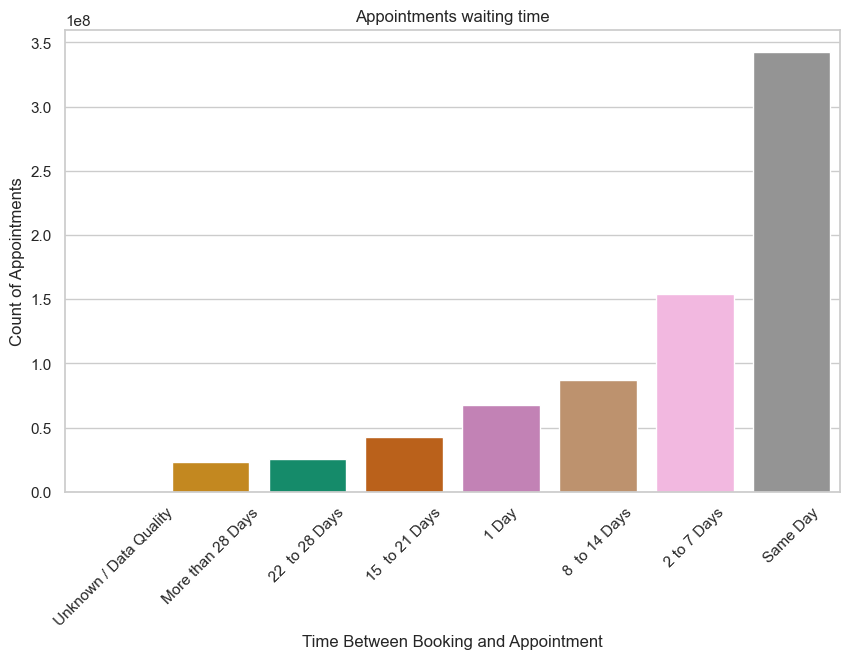

In [171]:
#Sorting values by count ascending and plotting on barplot to visualise results.
sorted_ar = aggregated_ar.sort_values(by='count_of_appointments')

#Creating barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='time_between_book_and_appointment', y='count_of_appointments', data=sorted_ar, palette='colorblind')
plt.xlabel('Time Between Booking and Appointment')
plt.ylabel('Count of Appointments')
plt.title('Appointments waiting time')
plt.xticks(rotation=45) 

#Viewing results
plt.show()

In [154]:
#Creating aggregated data set from actual_duration data
#that shows count_of_appointments by actual_duration.
#Grouping by 'actual_duration' and calculate the count for each group
aggregated_ad = ad.groupby('actual_duration')['count_of_appointments'].sum().reset_index()

#Sorting the aggregated DataFrame by 'count_of_appointments' in ascending order
aggregated_ad_sorted = aggregated_ad.sort_values(by='count_of_appointments')

#Viewing the sorted aggregated DataFrame
print(aggregated_ad_sorted)

          actual_duration  count_of_appointments
4           31-60 Minutes                9103432
3           21-30 Minutes               15026365
2           16-20 Minutes               16004247
1           11-15 Minutes               25160882
0             1-5 Minutes               28600865
5            6-10 Minutes               33800815
6  Unknown / Data Quality               40284086


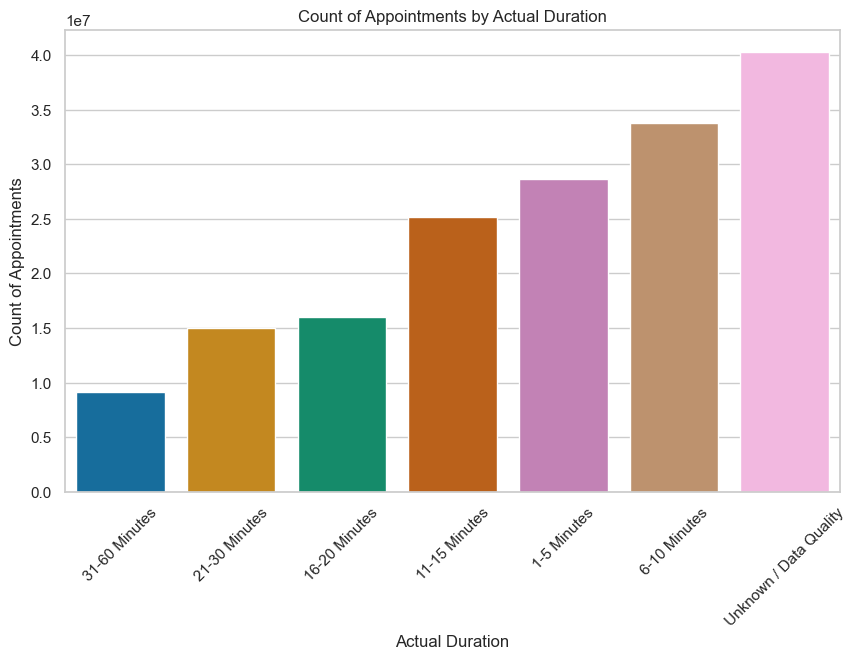

In [155]:
#Plotting the bar chart for above results:
plt.figure(figsize=(10, 6))
sns.barplot(x='actual_duration', y='count_of_appointments',
            data=aggregated_ad_sorted,
            palette='colorblind')

plt.xlabel('Actual Duration')
plt.ylabel('Count of Appointments')
plt.title('Count of Appointments by Actual Duration')
plt.xticks(rotation=45)

#Viewing results
plt.show()

In [156]:
#Grouping by 'sub_icb_location_name' and calculate the count for each group
aggregated_ad_sorted = aggregated_ad.sort_values(by='count_of_appointments', ascending=True)

# Viewing the aggregated DataFrame
print(aggregated_ad)
aggregated_ad

          actual_duration  count_of_appointments
0             1-5 Minutes               28600865
1           11-15 Minutes               25160882
2           16-20 Minutes               16004247
3           21-30 Minutes               15026365
4           31-60 Minutes                9103432
5            6-10 Minutes               33800815
6  Unknown / Data Quality               40284086


,actual_duration,count_of_appointments
0,1-5 Minutes,28600865
1,11-15 Minutes,25160882
2,16-20 Minutes,16004247
3,21-30 Minutes,15026365
4,31-60 Minutes,9103432
5,6-10 Minutes,33800815
6,Unknown / Data Quality,40284086


In [157]:
#Creating a new column 'month' by extracting the month from 'appointment_date' in actual_duration DataFrame
ad['month'] = ad['appointment_date'].dt.to_period('M')

#Groupping by 'month' and calculate the total number of appointments
monthly_aggregated = ad.groupby('month')['count_of_appointments'].sum().reset_index()

#View DataFrame
print(monthly_aggregated)

     month  count_of_appointments
0  2021-12               22853483
1  2022-01               23597196
2  2022-02               23351939
3  2022-03               27170002
4  2022-04               21948814
5  2022-05               25343941
6  2022-06               23715317


In [158]:
#Calculating the number of days in each month
monthly_aggregated['days_in_month'] = monthly_aggregated['month'].dt.days_in_month

#Calculating the daily value by dividing the total count by the number of days
monthly_aggregated['monthly_average'] = (monthly_aggregated['count_of_appointments']\
                                         / monthly_aggregated['days_in_month']).round(2)

#Viewing DataFrame
print(monthly_aggregated)

     month  count_of_appointments  days_in_month  monthly_average
0  2021-12               22853483             31        737209.13
1  2022-01               23597196             31        761199.87
2  2022-02               23351939             28        833997.82
3  2022-03               27170002             31        876451.68
4  2022-04               21948814             30        731627.13
5  2022-05               25343941             31        817546.48
6  2022-06               23715317             30        790510.57


In [159]:
#Calculating monthly average by location
#Merging the results back into the original DataFrame using 'month' as the key
ad_merge = pd.merge(ad, monthly_aggregated[['month', 'monthly_average']], on='month', how='left')

# Viewing DataFrame
print(ad_merge)
ad_merge

       sub_icb_location_code sub_icb_location_ons_code  \
0                        00L                 E38000130   
1                        00L                 E38000130   
2                        00L                 E38000130   
3                        00L                 E38000130   
4                        00L                 E38000130   
...                      ...                       ...   
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                             sub_icb_location_name icb_ons_code  \
0       NHS North East and North Cumbria ICB - 00L    E54000050   
1       NHS North East and North Cumbria ICB - 00L    E54000050   
2       NHS North East and North Cumbria ICB - 00L    E54000050   
3       NHS North East and North Cu

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,month,monthly_average
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,2021-12,737209.13
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619,2021-12,737209.13
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698,2021-12,737209.13
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277,2021-12,737209.13
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730,2021-12,737209.13
...,...,...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,31-60 Minutes,430,2022-06,790510.57
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,21-30 Minutes,751,2022-06,790510.57
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,16-20 Minutes,921,2022-06,790510.57
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,11-15 Minutes,1439,2022-06,790510.57


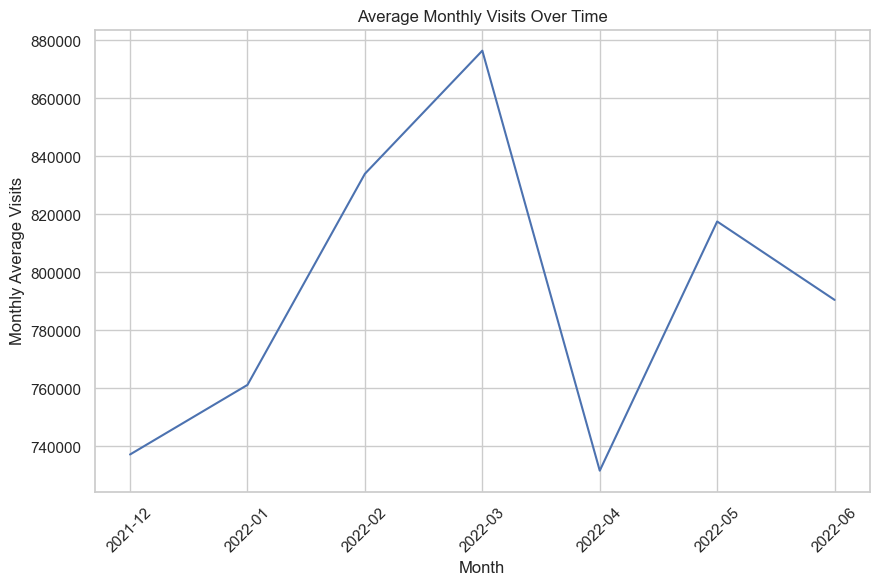

In [160]:
#Converting 'month' to string for easier visualisation
monthly_aggregated['month'] = monthly_aggregated['month'].astype(str)

#Creating a line plot 
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='monthly_average', data=monthly_aggregated)

plt.xlabel('Month')
plt.ylabel('Monthly Average Visits')
plt.title('Average Monthly Visits Over Time')
plt.xticks(rotation=45)  

#Viewing the plot
plt.show()

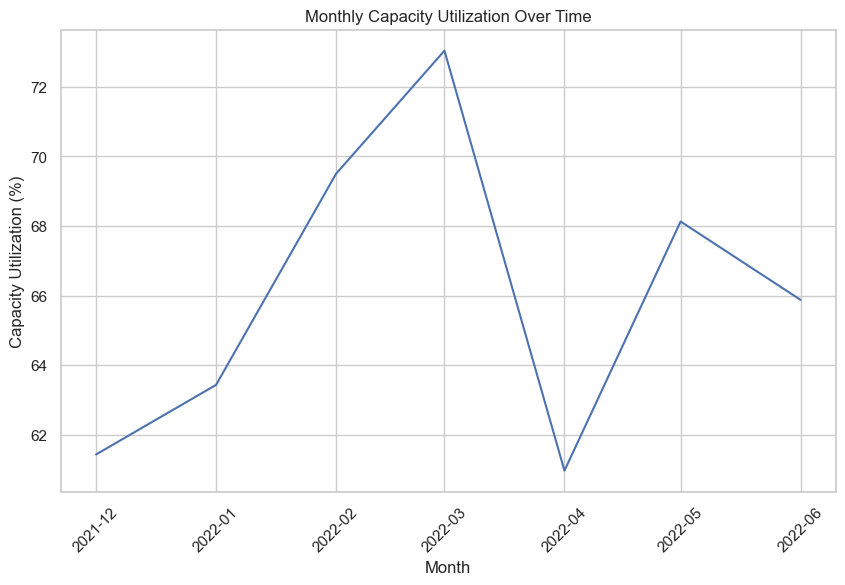

In [161]:
#Converting 'month' to datetime
monthly_aggregated['month'] = pd.to_datetime(monthly_aggregated['month'], format='%Y-%m')

#Calculating the maximum capacity based on the guideline from NHS (max 1,200,000 appointments per day)
max_capacity = 1200000.0  # Maximum capacity of 1,200,000 appointments per day

#Calculating the monthly capacity utilization
monthly_aggregated['capacity_utilization'] = (monthly_aggregated['monthly_average'] / max_capacity) * 100

#Creating a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='capacity_utilization', data=monthly_aggregated)

plt.xlabel('Month')
plt.ylabel('Capacity Utilization (%)')
plt.title('Monthly Capacity Utilization Over Time')
plt.xticks(rotation=45) 

#Viewing the plot
plt.show()

How do the healthcare professional types differ over time?

C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\2286895343.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type',


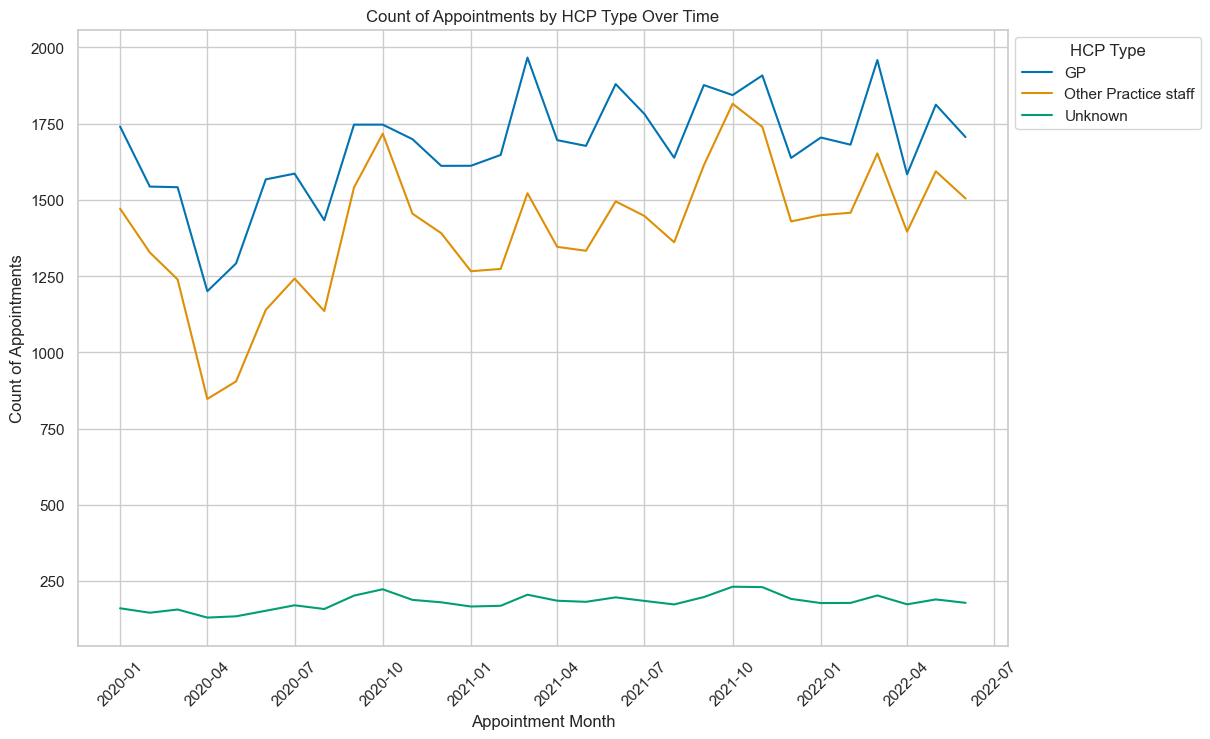

In [162]:
#Creating a line plot to show change of types over time:
plt.figure(figsize=(12, 8))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type',
             data=ar, palette='colorblind',
            ci=None)

plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.title('Count of Appointments by HCP Type Over Time')
plt.xticks(rotation=45)  
plt.legend(title='HCP Type', bbox_to_anchor=(1, 1))

#Viewing the plot
plt.show()

Are there significant changes in whether or not visits are attended?

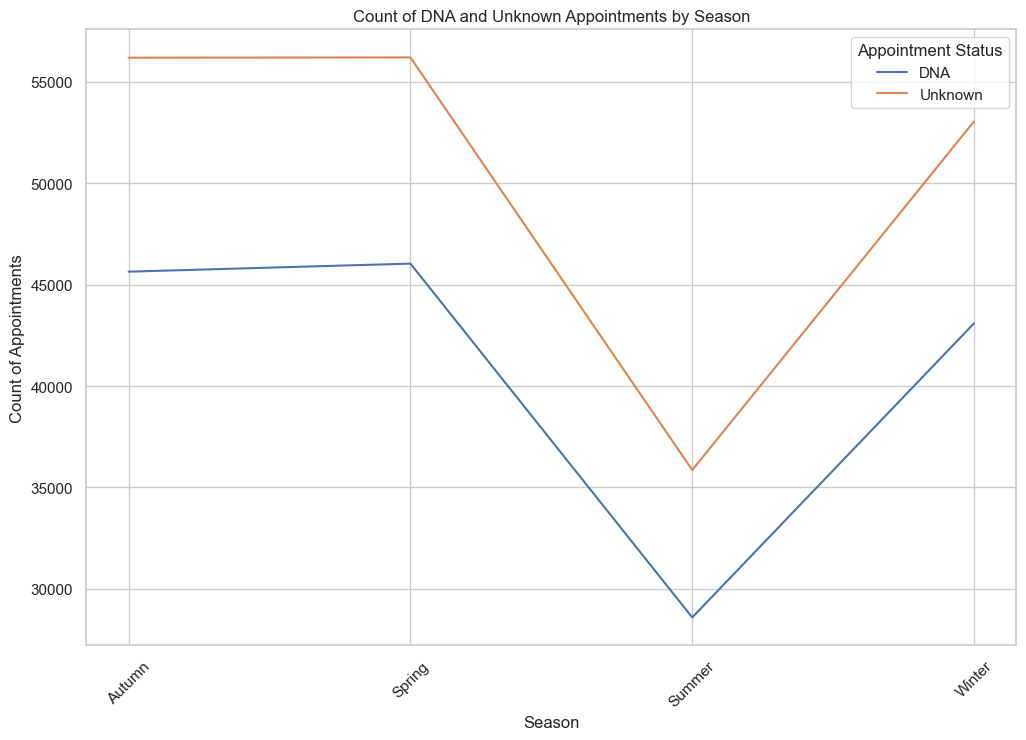

In [163]:
#Filtering the DataFrame for 'DNA' and 'Unknown' appointment statuses
filtered_ar = ar[ar['appointment_status'].isin(['DNA', 'Unknown'])]

#Groupping by 'season' and 'appointment_status', and calculate the count of appointments
season_counts = filtered_ar.groupby(['season', 'appointment_status']).size().reset_index(name='count_of_appointments')

#Creating lineplot to show correlation
plt.figure(figsize=(12, 8))
sns.lineplot(x='season', y='count_of_appointments', hue='appointment_status', data=season_counts)

plt.xlabel('Season')
plt.ylabel('Count of Appointments')
plt.title('Count of DNA and Unknown Appointments by Season')
plt.xticks(rotation=45)  
plt.legend(title='Appointment Status', bbox_to_anchor=(1, 1))

#Viewing the plot
plt.show()

Are there changes in terms of appointment type and the busiest months?

In [164]:
#Groupping by 'season' and calculate the total count of appointments
season_counts = ar.groupby('season')['count_of_appointments'].sum().reset_index()

#Sorting the DataFrame by 'count_of_appointments' in descending order
sorted_seasons = season_counts.sort_values(by='count_of_appointments', ascending=False)

#Selecting the top two seasons
top_two_seasons = sorted_seasons.head(2)

#Viewing the two busiest seasons
print("Two busiest seasons:")
print(top_two_seasons)

Two busiest seasons:
   season  count_of_appointments
1  Spring              211378067
0  Autumn              204933409


C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\2272854711.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='season', y='count_of_appointments',


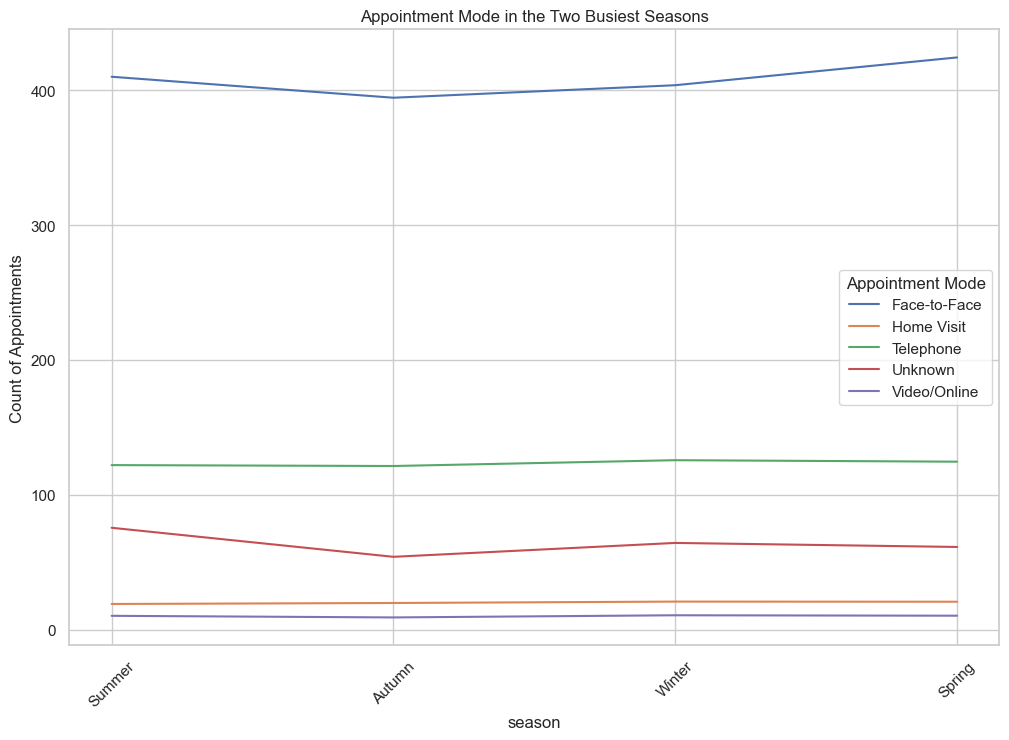

In [174]:
# Creating a line plot to show how appointments were changing for two busiest seasons
plt.figure(figsize=(12, 8))
sns.lineplot(x='season', y='count_of_appointments',
             hue='appointment_mode',
             data=filtered_ar,
            ci=None)

plt.ylabel('Count of Appointments')
plt.title('Appointment Mode in the Two Busiest Seasons')
plt.xticks(rotation=45)  
plt.legend(title='Appointment Mode')

#View the plot
plt.show()

Are there any trends in time between booking an appointment?

C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_13600\512086637.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='season', y='count_of_appointments', hue='time_between_book_and_appointment',


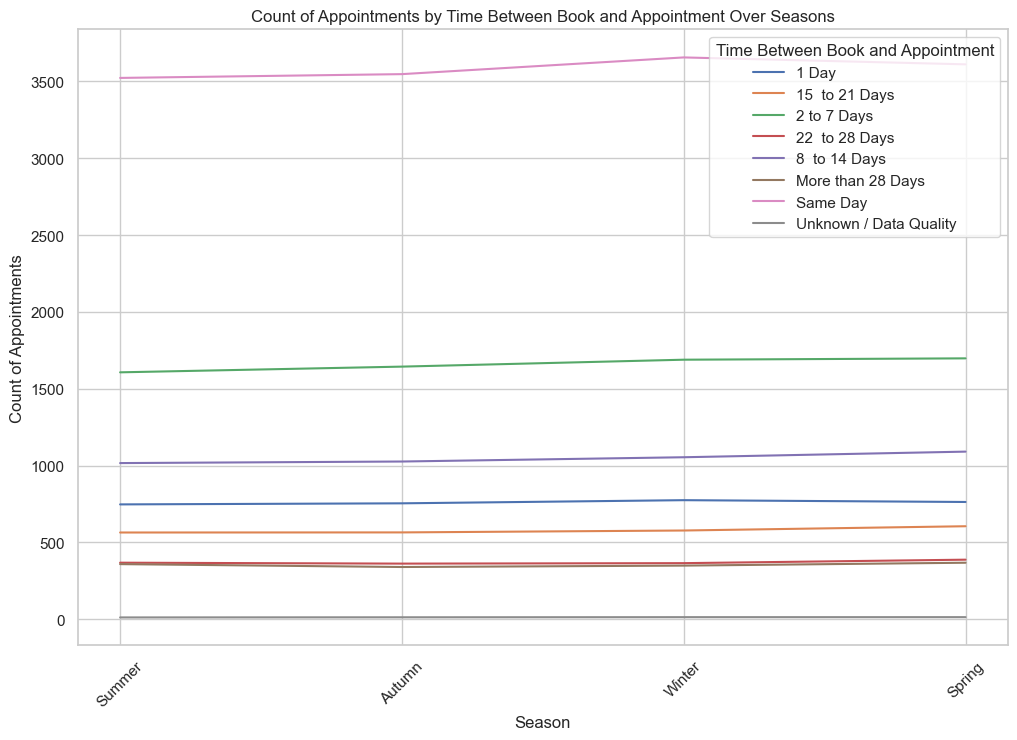

In [166]:
#Plotting how count_of appointments for time_between_book_and_appointment changes over seasons
plt.figure(figsize=(12, 8))
sns.lineplot(x='season', y='count_of_appointments', hue='time_between_book_and_appointment',
             data=ar,
            ci=None)

#Creating lineplot
plt.xlabel('Season')
plt.ylabel('Count of Appointments')
plt.title('Count of Appointments by Time Between Book and Appointment Over Seasons')
plt.xticks(rotation=45)  
plt.legend(title='Time Between Book and Appointment')

#Viewing the plot
plt.show()

How does the spread of service settings compare?

In [167]:
#Creating a new DataFrame consisting of the month of appointment and the number of appointments.
nc_settings = nc[['service_setting', 'appointment_month', 'count_of_appointments']]

#Viewing DataFrame
nc_settings.head()

,service_setting,appointment_month,count_of_appointments
0,Primary Care Network,2021-08-01,3
1,Other,2021-08-01,7
2,General Practice,2021-08-01,79
3,General Practice,2021-08-01,725
4,General Practice,2021-08-01,2


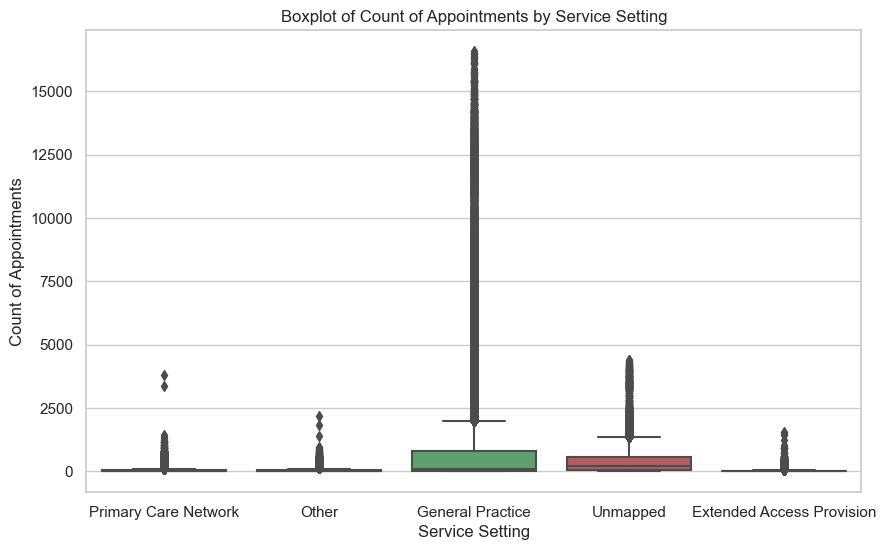

In [168]:
#Creating a boxplot to investigate the spread of service settings.
plt.figure(figsize=(10, 6))
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_settings)

#Describing axes
plt.xlabel('Service Setting')
plt.ylabel('Count of Appointments')
plt.title('Boxplot of Count of Appointments by Service Setting')

#View the plot
plt.show()